<a href="https://colab.research.google.com/github/Aingon14/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

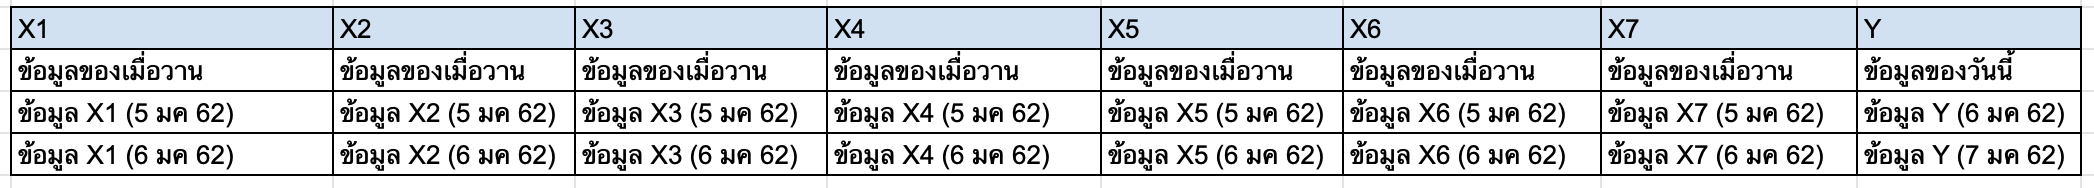

In [495]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [496]:
import pandas as pd
import numpy as np
import os

# Read data

In [497]:
#ความกดอากาศ
press_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
press_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
press_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
press_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
press_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
#ความชื้นสัมพัทธ์
hum_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4)
hum_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4)
hum_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4)
hum_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4)
hum_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4)
#ความเร็วลม
wind_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4)
wind_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4)
wind_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4)
wind_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4)
wind_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4)
#จำนวนเมฆ
cloud_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4)
cloud_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4)
cloud_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4)
cloud_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4)
cloud_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4)
#ปริมาณฝน
rain_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4)
rain_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4)
rain_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4)
rain_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4)
rain_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4)
#อุณหภูมิจุดน้ำค้าง
dew_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dew_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dew_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4)
dew_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dew_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4)
#อุณหภูมิตุ้มแห้ง
dry_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
dry_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4)
dry_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4)
dry_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
dry_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4)
#อุณหภูมิต่ำสุด
low_kk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4)
low_np = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4)
low_sk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4)
low_nk = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4)
low_lei = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/mid-term/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4)

In [498]:
press_kk.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


# Rename column

In [499]:
# กำหนดให้คอลัมน์ทุกตารางเป็นแบบนี้
col_name={'Unnamed: 0':'id','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'เฉลี่ย'}

###ความกดอากาศ (%)

In [500]:

press_kk=press_kk.rename(columns=col_name)
press_np=press_np.rename(columns=col_name)
press_sk=press_sk.rename(columns=col_name)
press_nk=press_nk.rename(columns=col_name)
press_lei=press_lei.rename(columns=col_name)

In [501]:
press_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


###ความชื้นสัมพัทธ์ (%)

In [502]:

hum_kk=hum_kk.rename(columns=col_name)
hum_np=hum_np.rename(columns=col_name)
hum_sk=hum_sk.rename(columns=col_name)
hum_nk=hum_nk.rename(columns=col_name)
hum_lei=hum_lei.rename(columns=col_name)

In [503]:
hum_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65


### ความเร็วลม (นอต)

In [504]:

wind_kk=wind_kk.rename(columns=col_name)
wind_np=wind_np.rename(columns=col_name)
wind_sk=wind_sk.rename(columns=col_name)
wind_nk=wind_nk.rename(columns=col_name)
wind_lei=wind_lei.rename(columns=col_name)

In [505]:
wind_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667


### จำนวนเมฆ (10ส่วน)

In [506]:
cloud_kk=cloud_kk.rename(columns=col_name)
cloud_np=cloud_np.rename(columns=col_name)
cloud_sk=cloud_sk.rename(columns=col_name)
cloud_nk=cloud_nk.rename(columns=col_name)
cloud_lei=cloud_lei.rename(columns=col_name)

In [507]:
cloud_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333


### ปริมาณฝน (มิลลิเมตร)

In [508]:
rain_kk=rain_kk.rename(columns=col_name)
rain_np=rain_np.rename(columns=col_name)
rain_sk=rain_sk.rename(columns=col_name)
rain_nk=rain_nk.rename(columns=col_name)
rain_lei=rain_lei.rename(columns=col_name)

In [509]:
rain_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


### อุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [510]:
dew_kk=dew_kk.rename(columns=col_name)
dew_np=dew_np.rename(columns=col_name)
dew_sk=dew_sk.rename(columns=col_name)
dew_nk=dew_nk.rename(columns=col_name)
dew_lei=dew_lei.rename(columns=col_name)

In [511]:
dew_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


### อุณหภูมิตุ้มแห้ง (เซลเซียส)

In [512]:
dry_kk=dry_kk.rename(columns=col_name)
dry_np=dry_np.rename(columns=col_name)
dry_sk=dry_sk.rename(columns=col_name)
dry_nk=dry_nk.rename(columns=col_name)
dry_lei=dry_lei.rename(columns=col_name)

In [513]:
dry_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


### อุณหภูมิต่ำสุด (เซลเซียส)

In [514]:
low_kk=low_kk.rename(columns=col_name)
low_np=low_np.rename(columns=col_name)
low_sk=low_sk.rename(columns=col_name)
low_nk=low_nk.rename(columns=col_name)
low_lei=low_lei.rename(columns=col_name)

In [515]:
low_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1


# เช็คและแก้ Missing

##จังหวัดขอนแก่น

### ความกดอากาศ จ.ขอนแก่น

In [516]:
press_kk=press_kk.replace('-',np.NaN)

In [517]:
# เช็คค่า missing
press_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [518]:
press_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,NaN,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.40,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,NaN,1009.749667


In [519]:
# เติมค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_kk['id'])):press_kk.iloc[i,:]=press_kk.iloc[i,:].fillna(press_kk.iloc[i]['เฉลี่ย'])

In [520]:
press_kk.isnull().any() # เช็คอีกรอบ

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
30          False
31          False
เฉลี่ย      False
dtype: bool

In [521]:
press_kk.head() #จะได้ข้อมูลที่ไม่มีค่า missing แล้ว

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667


### ความชื้นสัมพัทธ์ จ.ขอนแก่น

In [522]:
hum_kk=hum_kk.replace('-',np.NaN)

In [523]:
hum_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [524]:
# เติมค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_kk['id'])):hum_kk.iloc[i,:]=hum_kk.iloc[i,:].fillna(hum_kk.iloc[i]['เฉลี่ย'])

In [525]:
hum_kk.head() #ได้ค่าที่ไม่มี missing แล้ว

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


### ความเร็วลม จ.ขอนแก่น

In [526]:
wind_kk=wind_kk.replace('-',np.NaN)

In [527]:
wind_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3            True
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [528]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_kk['id'])):wind_kk.iloc[i,:]=wind_kk.iloc[i,:].fillna(wind_kk.iloc[i]['เฉลี่ย'])

In [529]:
hum_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71.0,71.0,68.0,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67.0,65.0,68.0,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66.0,63.0,64.0,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70.0,67.0,68.0,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68.0,65.0,65.0,65


### จำนวนเมฆ จ.ขอนแก่น

In [530]:
cloud_kk=cloud_kk.replace('-',np.NaN)

In [531]:
cloud_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3            True
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [532]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_kk['id'])):cloud_kk.iloc[i,:]=cloud_kk.iloc[i,:].fillna(cloud_kk.iloc[i]['เฉลี่ย'])

In [533]:
cloud_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9,10,10.0,8,10,10,10,...,2,3,5,3,3,5,4.0,2.0,2.000000,6.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2.0,2,3,6,9,...,6,6,3,2,2,1,3.0,2.0,3.533333,3.533333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,3,4.0,4,5,8,7,...,5,5,3,3,1,2,1.0,1.0,1.000000,3.516129
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,4,7.0,6,3,1,3,...,6,4,4,3,2,5,6.0,10.0,10.000000,5.354839
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,6,6,8.0,8,3,3,1,...,1,2,0,1,4,5,1.0,2.0,2.533333,2.533333


### ปริมาณฝน จ.ขอนแก่น

In [534]:
rain_kk=rain_kk.replace('-',np.NaN)

In [535]:
rain_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [536]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_kk['id'])):rain_kk.iloc[i,:]=rain_kk.iloc[i,:].fillna(rain_kk.iloc[i]['เฉลี่ย'])

In [537]:
rain_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T


In [538]:
# แก้ค่าที่วัดไม่ได้ T
rain_kk = rain_kk.replace('T',np.NaN)

In [539]:
rain_kk.fillna(0.1, inplace=True)

In [540]:
rain_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1


###อุณหภูมิจุดน้ำค้าง จ.ขอนแก่น

In [541]:
dew_kk=dew_kk.replace('-',np.NaN)

In [542]:
dew_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [543]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_kk['id'])):dew_kk.iloc[i,:]=dew_kk.iloc[i,:].fillna(dew_kk.iloc[i]['เฉลี่ย'])

In [544]:
dew_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.700000,19.700000,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19.0,18.300000,18.910000,18.910000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.100000,16.300000,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.700000,16.700000,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,18.0,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,18.772414,18.772414,18.772414


###อุณหภูมิตุ้มแห้ง จ.ขอนแก่น



In [545]:
dry_kk=dry_kk.replace('-',np.NaN)

In [546]:
dry_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [547]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_kk['id'])):dry_kk.iloc[i,:]=dry_kk.iloc[i,:].fillna(dry_kk.iloc[i]['เฉลี่ย'])

In [548]:
dry_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26.0,26.0,25.8,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23.0,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,26.5,26.5,26.5


###อุณหภูมิต่ำสุด จ.ขอนแก่น


In [549]:
low_kk=low_kk.replace('-',np.NaN)

In [550]:
low_kk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25          False
26          False
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [551]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_kk['id'])):low_kk.iloc[i,:]=low_kk.iloc[i,:].fillna(low_kk.iloc[i]['เฉลี่ย'])

In [552]:
low_kk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22.0,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,20.3,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17.0,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22.0,22.2,20.1,20.1,20.1


## จังหวัดนครพนม

###ความกดอากาศ จ.นครพนม

In [553]:
press_np=press_np.replace('-',np.NaN)

In [554]:
press_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [555]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_np['id'])):press_np.iloc[i,:]=press_np.iloc[i,:].fillna(press_np.iloc[i]['เฉลี่ย'])

In [556]:
press_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.280000,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.60,1011.13,1012.184667,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.730000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.500000,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,1010.608000,1010.608000


###ความชื้นสัมพัทธ์ จ.นครพนม

In [557]:
hum_np=hum_np.replace('-',np.NaN)

In [558]:
hum_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [559]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_np['id'])):hum_np.iloc[i,:]=hum_np.iloc[i,:].fillna(hum_np.iloc[i]['เฉลี่ย'])

In [560]:
hum_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,95,84,74,72,87,88,81,...,66,67,70,69,71,66,72.0,70.0,69.0,77
1,2,357201-นครพนม จ.นครพนม,2011-11-01,69,67,70,68,71,68,73,...,66,66,70,78,74,69,66.0,65.0,69.0,69
2,3,357201-นครพนม จ.นครพนม,2011-12-01,64,56,62,67,69,77,73,...,66,54,60,61,70,71,63.0,66.0,70.0,65
3,1,357201-นครพนม จ.นครพนม,2012-01-01,71,70,64,59,68,69,66,...,73,74,62,67,74,71,61.0,59.0,62.0,71
4,2,357201-นครพนม จ.นครพนม,2012-02-01,68,69,66,71,71,71,64,...,63,61,64,64,68,76,69.0,65.0,65.0,65


### ความเร็วลม จ.นครพนม

In [561]:
wind_np=wind_np.replace('-',np.NaN)

In [562]:
wind_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5            True
6           False
7            True
8            True
9           False
10           True
11           True
12           True
13          False
14          False
15           True
16           True
17          False
18           True
19          False
20           True
21           True
22           True
23          False
24           True
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [563]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_np['id'])):wind_np.iloc[i,:]=wind_np.iloc[i,:].fillna(wind_np.iloc[i]['เฉลี่ย'])

In [564]:
wind_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1.0,0,2.0,...,1,2.0,2.0,1,2,2.0,1.0,1.0,1.0,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1.0,1,1.0,...,3,3.0,2.0,2,1,1.0,1.0,1.0,1.2,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1.0,1,1.0,...,1,3.0,3.0,1,2,1.0,1.0,2.0,2.0,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,2.0,3,3.0,...,4,1.0,5.0,1,1,1.0,4.0,5.0,4.0,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0.0,0.0,1,1.0,...,1,2.0,2.0,3,3,3.0,1.0,2.0,2.2,2.200000


### จำนวนเมฆ จ.นครพนม

In [565]:
cloud_np=cloud_np.replace('-',np.NaN)

In [566]:
cloud_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11          False
12          False
13           True
14           True
15           True
16          False
17          False
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26          False
27           True
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [567]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_np['id'])):cloud_np.iloc[i,:]=cloud_np.iloc[i,:].fillna(cloud_np.iloc[i]['เฉลี่ย'])

In [568]:
cloud_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,7.0,8.0,8.0,10.0,10.0,9.0,...,2.0,2.0,2.0,2,3.0,3,4.0,2.0,4.000000,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,2.0,2.0,3.0,5.0,7.0,9.0,...,4.0,4.0,4.0,2,2.0,2,1.0,1.0,3.066667,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2.0,2.0,2.0,4.0,4.0,7.0,8.0,...,4.0,2.0,2.0,2,2.0,1,2.0,1.0,1.000000,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,4.0,6.0,4.0,2.0,5.0,...,5.0,3.0,2.0,2,2.0,3,3.0,6.0,5.000000,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5.0,5.0,8.0,7.0,3.0,3.0,2.0,...,2.0,2.0,2.0,3,7.0,6,2.0,1.0,2.966667,2.966667


### ปริมาณฝน จ.นครพนม

In [569]:
rain_np=rain_np.replace('-', np.NaN)

In [570]:
rain_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [571]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_np['id'])):rain_np.iloc[i,:]=rain_np.iloc[i,:].fillna(rain_np.iloc[i]['เฉลี่ย'])

In [572]:
rain_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0.0,0,0.0,0,0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0,0.0,0,0,T,T,0,...,0,0,0,0,0.5,0,0.0,0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,NaN
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0,0.0,0,0,0,0,0,...,2.3,0,0,0,0.0,0,0.0,0,0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,1.2,0,0.0,1.2,1.2,1.2


In [573]:
# แก้ค่าที่วัดไม่ได้ T
rain_np = rain_np.replace('T',np.NaN)

In [574]:
rain_np.fillna(0.1, inplace=True)

In [575]:
rain_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,1.2,1.2,1.2


### อุณหภูมิจุดน้ำค้าง จ.นครพนม

In [576]:
dew_np=dew_np.replace('-',np.NaN)

In [577]:
dew_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [578]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_np['id'])):dew_np.iloc[i,:]=dew_np.iloc[i,:].fillna(dew_np.iloc[i]['เฉลี่ย'])

In [579]:
low_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


###อุณหภูมิตุ้มแห้ง จ.นครพนม

In [580]:
dry_np=dry_np.replace('-',np.NaN)

In [581]:
dry_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [582]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_np['id'])):dry_np.iloc[i,:]=dry_np.iloc[i,:].fillna(dry_np.iloc[i]['เฉลี่ย'])

In [583]:
dry_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.9,26.1,25.3,24.7,23.1,23.2,25.6,...,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9,26.0
1,2,357201-นครพนม จ.นครพนม,2011-11-01,25.8,25.8,25.5,26.8,26.5,27.8,27.3,...,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,25.5,25.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,25.4,22.1,20.4,21.3,22.6,23.1,25.2,...,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9,21.3
3,1,357201-นครพนม จ.นครพนม,2012-01-01,21.7,22.8,24.7,23.4,20.3,21.2,21.1,...,20.9,21.4,21.3,21.4,22.8,25.2,24.5,24.1,22.6,22.6
4,2,357201-นครพนม จ.นครพนม,2012-02-01,23.0,24.3,23.4,24.0,25.6,27.3,27.8,...,27.4,28.8,28.5,27.4,23.8,22.4,26.7,25.1,25.1,25.1


### อุณหภูมิต่ำสุด จ.นครพนม

In [584]:
low_np=low_np.replace('-',np.NaN)

In [585]:
low_np.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11           True
12          False
13          False
14          False
15          False
16           True
17           True
18           True
19           True
20          False
21           True
22           True
23           True
24          False
25           True
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [586]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_np['id'])):low_np.iloc[i,:]=low_np.iloc[i,:].fillna(low_np.iloc[i]['เฉลี่ย'])

In [587]:
low_np.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22.0,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21.0,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,20.4,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15.0,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19.0,19.2,19.2,19.2


## จังหวัดสกลนคร

###ความกดอากาศ จ.สกลนคร

In [588]:
press_sk=press_sk.replace('-',np.NaN)

In [589]:
press_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [590]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_sk['id'])):press_sk.iloc[i,:]=press_sk.iloc[i,:].fillna(press_sk.iloc[i]['เฉลี่ย'])

In [591]:
press_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.210,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,1012.255,1012.255000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.80,1016.96,1017.630,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.520,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,1010.554,1010.554000


###ความชื้นสัมพัทธ์ จ.สกลนคร

In [592]:
hum_sk=hum_sk.replace('-',np.NaN)

In [593]:
hum_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [594]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_sk['id'])):hum_sk.iloc[i,:]=hum_sk.iloc[i,:].fillna(hum_sk.iloc[i]['เฉลี่ย'])

In [595]:
hum_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,87,88,77,75,87,86,81,...,74,73,73,72,72,70,74.0,73.0,72.0,78
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,71,71,71,72,73,70,75,...,68,66,71,71,70,70,69.0,69.0,70.0,70
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,66,61,64,67,70,73,72,...,69,65,64,62,69,69,69.0,69.0,68.0,6
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,67,69,66,63,65,67,65,...,75,72,67,72,73,71,64.0,64.0,62.0,72
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,66,70,67,69,73,64,60,...,55,53,55,64,69,74,71.0,64.0,64.0,64


### ความเร็วลม จ.สกลนคร

In [596]:
wind_sk=wind_sk.replace('-',np.NaN)

In [597]:
wind_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20           True
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [598]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_sk['id'])):wind_sk.iloc[i,:]=wind_sk.iloc[i,:].fillna(wind_sk.iloc[i]['เฉลี่ย'])

In [599]:
wind_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2.0,1,0,2,...,1,2,2,1,2,2,1.0,1.0,1.000000,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1.0,1,1,1,...,3,3,2,2,1,1,1.0,1.0,1.200000,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1.0,1,1,1,...,1,3,3,1,2,1,1.0,2.0,2.000000,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


### จำนวนเมฆ จ.สกลนคร

In [600]:
cloud_sk=cloud_sk.replace('-',np.NaN)

In [601]:
cloud_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [602]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_sk['id'])):cloud_sk.iloc[i,:]=cloud_sk.iloc[i,:].fillna(cloud_sk.iloc[i]['เฉลี่ย'])

In [603]:
cloud_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,9.0,9.0,7.0,7.0,9.0,10.0,8.0,...,2.000000,1.000000,2.000000,1.0,1.0,3.0,3.0,1.0,4.000000,5.483871
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,0.0,0.0,1.0,3.0,7.0,8.0,...,4.000000,3.000000,1.000000,1.0,1.0,1.0,1.0,0.0,2.300000,2.300000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,1.0,2.0,2.0,2.0,6.0,6.0,...,3.000000,2.000000,2.703704,0.0,0.0,0.0,0.0,1.0,2.703704,2.703704
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,0.0,0.0,4.0,3.0,2.0,0.0,1.0,...,4.000000,1.000000,0.000000,3.0,0.0,1.0,4.0,7.0,8.000000,3.548387
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,4.0,4.0,8.0,5.0,1.0,0.0,0.0,...,2.142857,2.142857,2.142857,1.0,6.0,4.0,0.0,0.0,2.142857,2.142857


### ปริมาณฝน จ.สกลนคร

In [604]:
rain_sk=rain_sk.replace('-',np.NaN)

In [605]:
rain_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [606]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_sk['id'])):rain_sk.iloc[i,:]=rain_sk.iloc[i,:].fillna(rain_sk.iloc[i]['เฉลี่ย'])

In [607]:
rain_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,...,0.0,0,0.0,0,0,0,0.0,0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,6,6,6


In [608]:
# แก้ค่าที่วัดไม่ได้ T
rain_sk = rain_sk.replace('T',np.NaN)

In [609]:
rain_sk.fillna(0.1, inplace=True)

In [610]:
rain_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,6.0,6.0,6.0


### อุณหภูมิจุดน้ำค้าง จ.สกลนคร

In [611]:
dew_sk=dew_sk.replace('-',np.NaN)

In [612]:
dew_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [613]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_sk['id'])):dew_sk.iloc[i,:]=dew_sk.iloc[i,:].fillna(dew_sk.iloc[i]['เฉลี่ย'])

In [614]:
dew_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.6,21.1,20.0,21.2,20.8,21.9,...,20.7,21.5,21.1,21.0,21.2,21.1,20.4,19.5,19.700000,21.429032
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,19.6,19.4,19.5,20.0,20.9,21.4,21.7,...,18.9,16.9,17.5,18.7,19.1,19.1,18.4,18.5,18.973333,18.973333
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,18.0,14.0,12.3,14.1,15.7,18.1,19.5,...,15.1,12.2,9.6,10.1,13.5,15.6,16.0,16.2,15.500000,14.400000
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,15.3,16.3,17.0,15.6,13.5,14.6,13.6,...,17.2,16.7,14.4,14.6,17.6,19.1,16.9,16.1,14.400000,16.845161
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,15.9,18.0,16.6,17.6,20.2,19.7,18.8,...,16.0,18.0,17.8,19.5,18.2,18.7,20.3,18.5,17.233333,17.233333


###อุณหภูมิตุ้มแห้ง จ.สกลนคร

In [615]:
dry_sk=dry_sk.replace('-',np.NaN)

In [616]:
dry_sk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [617]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_sk['id'])):dry_sk.iloc[i,:]=dry_sk.iloc[i,:].fillna(dry_sk.iloc[i]['เฉลี่ย'])

In [618]:
dry_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,26.9,25.9,25.7,25.2,23.6,23.5,25.6,...,26.2,27.0,26.6,26.9,27.1,27.5,25.4,25.2,25.5,26.0
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,25.7,25.5,25.5,26.1,26.7,27.8,26.7,...,25.8,23.8,23.7,24.8,25.6,25.7,25.3,25.4,25.3,25.3
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,25.4,22.4,19.9,21.0,22.0,23.5,25.2,...,21.4,19.4,17.1,18.1,20.0,22.0,22.7,22.9,22.3,21.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,22.2,22.7,24.3,23.3,20.5,21.4,20.9,...,22.0,22.1,21.0,20.2,23.2,25.2,24.4,23.4,22.1,22.6
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,23.0,24.1,23.1,23.8,25.9,27.8,28.1,...,27.3,29.6,28.6,27.4,24.4,23.8,26.3,25.0,25.0,25.0


### อุณหภูมิต่ำสุด จ.สกลนคร

In [619]:
low_sk=low_sk.replace('-',np.NaN)

In [620]:
low_sk.isnull().any()

id           True
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21           True
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [621]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_sk['id'])):low_sk.iloc[i,:]=low_sk.iloc[i,:].fillna(low_sk.iloc[i]['เฉลี่ย'])

In [622]:
low_sk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,24.5,23.1,22.6,21.8,22.5,21.1,23.0,...,22.4,22.4,22.6,22.1,22.2,24.3,22.0,20.7,20.7,22.7
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,20.5,20.5,20.4,20.6,21.5,24.0,24.3,...,22.5,20.9,18.5,19.0,19.8,20.0,19.9,19.6,20.5,20.5
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,19.5,19.3,14.0,15.3,15.8,18.0,21.2,...,16.2,16.7,11.7,13.0,12.6,15.3,16.4,17.2,17.0,15.9
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,16.9,16.5,18.6,19.9,15.3,15.0,16.0,...,19.8,16.0,17.1,14.6,17.3,20.0,19.4,20.0,18.7,18.2
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,18.3,19.0,19.8,19.3,20.2,20.5,21.5,...,19.2,23.5,21.0,20.9,20.8,19.3,19.4,19.0,19.0,19.0


## จังหวัดหนองคาย

###ความกดอากาศ จ.หนองคาย

In [623]:
press_nk=press_nk.replace('-',np.NaN)

In [624]:
press_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [625]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_nk['id'])):press_nk.iloc[i,:]=press_nk.iloc[i,:].fillna(press_nk.iloc[i]['เฉลี่ย'])

In [626]:
press_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667


###ความชื้นสัมพัทธ์ จ.หนองคาย

In [627]:
hum_nk=hum_nk.replace('-',np.NaN)

In [628]:
hum_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [629]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_nk['id'])):hum_nk.iloc[i,:]=hum_nk.iloc[i,:].fillna(hum_nk.iloc[i]['เฉลี่ย'])

In [630]:
hum_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70.0,66.0,68.0,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71.0,69.0,68.0,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70.0,67.0,68.0,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65.0,68.0,73.0,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69.0,69.0,69.0,69


### ความเร็วลม จ.หนองคาย

In [631]:
wind_nk=wind_nk.replace('-',np.NaN)

In [632]:
wind_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4            True
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [633]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_nk['id'])):wind_nk.iloc[i,:]=wind_nk.iloc[i,:].fillna(wind_nk.iloc[i]['เฉลี่ย'])

In [634]:
wind_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,4,4,2.0,1,3,1,...,2,2,3,3,3,3,3.0,3.0,4.000000,2.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,3,3,3,2.0,2,1,2,...,7,4,2,3,2,2,2.0,2.0,2.433333,2.433333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,5,3,2.0,2,2,2,...,3,6,5,4,2,2,2.0,3.0,2.000000,3.161290
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5.0,3,2,4,...,5,4,5,3,2,3,3.0,3.0,4.000000,2.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,3,4,2.0,1,2,2,...,1,2,1,3,7,5,3.0,2.0,2.733333,2.733333


### จำนวนเมฆ จ.หนองคาย

In [635]:
cloud_nk=cloud_nk.replace('-',np.NaN)

In [636]:
cloud_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [637]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_nk['id'])):cloud_nk.iloc[i,:]=cloud_nk.iloc[i,:].fillna(cloud_nk.iloc[i]['เฉลี่ย'])

In [638]:
cloud_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10.0,10.0,8.000000,9.0,9.0,10.000000,10.000000,...,3.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,4.000000,3.000000,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1.0,0.0,0.000000,1.0,1.0,2.000000,6.000000,...,6.000000,6.000000,2.571429,0.000000,1.0,2.0,4.0,2.000000,2.571429,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4.0,4.0,3.285714,2.0,7.0,5.000000,5.000000,...,2.000000,8.000000,1.000000,3.285714,3.0,1.0,1.0,3.000000,3.285714,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.000000,6.0,8.0,2.000000,3.000000,...,8.000000,5.000000,6.000000,6.000000,1.0,0.0,6.0,10.000000,9.000000,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7.0,8.0,10.000000,6.0,1.0,4.928571,4.928571,...,4.928571,4.928571,4.928571,4.928571,6.0,5.0,6.0,4.928571,4.928571,4.928571


### ปริมาณฝน จ.หนองคาย

In [639]:
rain_nk=rain_nk.replace('-',np.NaN)

In [640]:
rain_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [641]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_nk['id'])):rain_nk.iloc[i,:]=rain_nk.iloc[i,:].fillna(rain_nk.iloc[i]['เฉลี่ย'])

In [642]:
rain_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


In [643]:
# แก้ค่าที่วัดไม่ได้ T
rain_nk = rain_nk.replace('T',np.NaN)

In [644]:
rain_nk.fillna(0.1, inplace=True)

In [645]:
rain_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,43.9,43.9,43.9


### อุณหภูมิจุดน้ำค้าง จ.หนองคาย

In [646]:
dew_nk=dew_nk.replace('-',np.NaN)

In [647]:
dew_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [648]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_nk['id'])):dew_nk.iloc[i,:]=dew_nk.iloc[i,:].fillna(dew_nk.iloc[i]['เฉลี่ย'])

In [649]:
dew_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,24.6,23.8,22.4,21.9,23.3,22.0,23.0,...,22.6,22.3,21.1,21.5,21.4,21.3,20.8,19.8,20.30,22.074194
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,19.3,19.0,18.7,19.1,20.2,20.7,21.5,...,17.9,16.2,16.2,18.1,18.7,19.1,19.7,19.1,19.04,19.040000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,18.4,15.5,14.4,14.6,15.6,17.7,19.0,...,15.2,11.4,8.9,8.5,13.0,16.7,17.7,17.6,16.70,14.751613
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,16.4,17.6,18.3,16.9,15.4,16.2,15.8,...,20.9,17.0,17.4,15.4,18.3,18.9,18.3,18.4,17.20,17.532258
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,17.5,18.8,20.0,19.8,21.3,21.2,19.8,...,18.5,18.7,18.5,19.9,19.5,20.6,20.2,19.1,18.89,18.890000


###อุณหภูมิตุ้มแห้ง จ.หนองคาย

In [650]:
dry_nk=dry_nk.replace('-',np.NaN)

In [651]:
dry_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [652]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_nk['id'])):dry_nk.iloc[i,:]=dry_nk.iloc[i,:].fillna(dry_nk.iloc[i]['เฉลี่ย'])

In [653]:
dry_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27.0,27.2,27.0
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,25.9,25.9
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,25.6,25.6,25.6


### อุณหภูมิต่ำสุด จ.หนองคาย

In [654]:
low_nk=low_nk.replace('-',np.NaN)

In [655]:
low_nk.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [656]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_nk['id'])):low_nk.iloc[i,:]=low_nk.iloc[i,:].fillna(low_nk.iloc[i]['เฉลี่ย'])

In [657]:
low_nk.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23.0,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21.0,21.1,20.1,21.0,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16.0,18.0,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20.0,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,20.2,20.2,20.2


## จังหวัดเลย

###ความกดอากาศ จ.เลย

In [658]:
press_lei=press_lei.replace('-',np.NaN)

In [659]:
press_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [660]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(press_lei['id'])):press_lei.iloc[i,:]=press_lei.iloc[i,:].fillna(press_lei.iloc[i]['เฉลี่ย'])

In [661]:
press_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.10,1010.43,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,1009.516667,1009.516667


###ความชื้นสัมพัทธ์ จ.เลย

In [662]:
hum_lei=hum_lei.replace('-',np.NaN)

In [663]:
hum_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [664]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(hum_lei['id'])):hum_lei.iloc[i,:]=hum_lei.iloc[i,:].fillna(hum_lei.iloc[i]['เฉลี่ย'])

In [665]:
hum_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82.0,83.0,85.0,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82.0,79.0,82.0,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78.0,81.0,78.0,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77.0,82.0,79.0,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70.0,73.0,73.0,73


### ความเร็วลม จ.เลย

In [666]:
wind_lei=wind_lei.replace('-',np.NaN)

In [667]:
wind_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5            True
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16           True
17          False
18          False
19           True
20          False
21          False
22          False
23          False
24           True
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [668]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(wind_lei['id'])):wind_lei.iloc[i,:]=wind_lei.iloc[i,:].fillna(wind_lei.iloc[i]['เฉลี่ย'])

In [669]:
wind_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,2,2,3,2,3.0,2,1,...,1,1.0,2,2,1,2,2.0,2.0,1.0,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,2,1,1,2.0,2,2,...,3,2.0,1,1,2,1,2.0,1.0,1.7,1.700000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,3,2,1.0,2,1,...,1,2.0,3,2,1,2,1.0,2.0,2.0,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,1,2,2.0,2,2,...,2,1.0,3,2,2,2,2.0,1.0,1.0,1.838710
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,2,2,1,1.0,2,1,...,1,1.0,1,1,3,4,2.0,1.0,1.7,1.700000


### จำนวนเมฆ จ.เลย

In [670]:
cloud_lei=cloud_lei.replace('-',np.NaN)

In [671]:
cloud_lei.isnull().any()

id             False
สถานี          False
เดือน/ปี       False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
เฉลี่ย         False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
dtype: bool

In [672]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(cloud_lei['id'])):cloud_lei.iloc[i,:]=cloud_lei.iloc[i,:].fillna(cloud_lei.iloc[i]['เฉลี่ย'])

In [673]:
cloud_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,8.0,10.0,10.0,9.0,8.0,10.0,10.000000,...,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2.0,1.0,2.0,1.0,1.0,1.0,2.000000,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1.0,3.0,1.0,3.0,3.0,2.0,3.000000,...,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1.0,1.0,3.0,6.0,6.0,2.0,1.000000,...,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,8.0,5.0,10.0,7.0,1.0,0.0,2.809524,...,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524,2.809524


### ปริมาณฝน จ.เลย

In [674]:
rain_lei=rain_lei.replace('-',np.NaN)

In [675]:
rain_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
30           True
31           True
เฉลี่ย       True
dtype: bool

In [676]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(rain_lei['id'])):rain_lei.iloc[i,:]=rain_lei.iloc[i,:].fillna(rain_lei.iloc[i]['เฉลี่ย'])

In [677]:
rain_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0,3.4,1.8,...,0.0,0,0.0,0.0,0,0.2,0.0,0,0.0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.6,0.0,0,7.4,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,T,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0.0,0,0.0,0.0,...,0.0,0,0.0,0.0,1,0.0,0.0,2.4,2.4,2.4


### อุณหภูมิจุดน้ำค้าง จ.เลย

In [678]:
dew_lei=dew_lei.replace('-',np.NaN)

In [679]:
dew_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [680]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dew_lei['id'])):dew_lei.iloc[i,:]=dew_lei.iloc[i,:].fillna(dew_lei.iloc[i]['เฉลี่ย'])

In [681]:
dew_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.200000,20.200000,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.400000,18.953333,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.200000,16.500000,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.200000,17.400000,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,17.310345,17.310345,17.310345


###อุณหภูมิตุ้มแห้ง จ.เลย

In [682]:
dry_lei=dry_lei.replace('-',np.NaN)

In [683]:
dry_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [684]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(dry_lei['id'])):dry_lei.iloc[i,:]=dry_lei.iloc[i,:].fillna(dry_lei.iloc[i]['เฉลี่ย'])

In [685]:
dry_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,24.4,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,25.4,25.4,25.4


### อุณหภูมิต่ำสุด จ.เลย

In [686]:
low_lei=low_lei.replace('-',np.NaN)

In [687]:
low_lei.isnull().any()

id          False
สถานี       False
เดือน/ปี    False
1            True
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12           True
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28           True
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [688]:
# จากนั้น แทนค่า missing ด้วยค่าเฉลี่ย
for i in range(len(low_lei['id'])):low_lei.iloc[i,:]=low_lei.iloc[i,:].fillna(low_lei.iloc[i]['เฉลี่ย'])

In [689]:
low_lei.head()

,id,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21.0,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,19.2,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18.0,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13.0,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16.0,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19.0,21.0,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19.0,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,18.6,18.6,18.6


# ทำตารางใหม่

### จ.ขอนแก่น

In [690]:
#ความกดอากาศ
press_kk_tab = press_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
press_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
press_kk_tab.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_kk_tab['province_id'] = len(press_kk_tab)*['khonkaen']
press_kk_tab
press_kk_tab['year'] = press_kk_tab['เดือน/ปี'].dt.year
press_kk_tab['month'] = press_kk_tab['เดือน/ปี'].dt.month
press_kk_tab = press_kk_tab.drop(['เดือน/ปี'], axis =1)
press_kk_tab


,id,สถานี,day,ความกดอากาศ(%),province_id,year,month
0,1,352201-หนองคาย จ.หนองคาย,1,1005.470000,khonkaen,2011,10
1,1,352201-หนองคาย จ.หนองคาย,2,1006.650000,khonkaen,2011,10
2,1,352201-หนองคาย จ.หนองคาย,3,1007.490000,khonkaen,2011,10
3,1,352201-หนองคาย จ.หนองคาย,4,1008.280000,khonkaen,2011,10
4,1,352201-หนองคาย จ.หนองคาย,5,1009.880000,khonkaen,2011,10
...,...,...,...,...,...,...,...
1755,2,352201-หนองคาย จ.หนองคาย,28,1013.040000,khonkaen,2022,2
1756,2,352201-หนองคาย จ.หนองคาย,29,1013.370000,khonkaen,2022,2
1757,2,352201-หนองคาย จ.หนองคาย,30,1013.980000,khonkaen,2022,2
1758,2,352201-หนองคาย จ.หนองคาย,31,1012.456667,khonkaen,2022,2


In [691]:
press_kk_tab2 = press_kk_tab[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_kk_tab2_data = press_kk_tab2[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_kk_tab2_data["id"] = press_kk_tab2_data["province_id"].astype(str) + press_kk_tab2_data["index"].astype(str)
press_kk_las = press_kk_tab2_data[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_kk_las

<ipython-input-691-b7c175d6c623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_kk_tab2_data["id"] = press_kk_tab2_data["province_id"].astype(str) + press_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,khonkaen0,khonkaen,2011,10,1,1005.470000
1,khonkaen1,khonkaen,2011,10,2,1006.650000
2,khonkaen2,khonkaen,2011,10,3,1007.490000
3,khonkaen3,khonkaen,2011,10,4,1008.280000
4,khonkaen4,khonkaen,2011,10,5,1009.880000
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,1013.040000
1756,khonkaen1756,khonkaen,2022,2,29,1013.370000
1757,khonkaen1757,khonkaen,2022,2,30,1013.980000
1758,khonkaen1758,khonkaen,2022,2,31,1012.456667


In [692]:
#ความชื้นสัมพัทธ์
hum_kk_tab = hum_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
hum_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
hum_kk_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
hum_kk_tab['province_id'] = len(hum_kk_tab)*['khonkaen']
hum_kk_tab
hum_kk_tab['year'] = hum_kk_tab['เดือน/ปี'].dt.year
hum_kk_tab['month'] = hum_kk_tab['เดือน/ปี'].dt.month
hum_kk_tab = hum_kk_tab.drop(['เดือน/ปี'], axis =1)
hum_kk_tab
hum_kk_tab2 = hum_kk_tab[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
hum_kk_tab2_data = hum_kk_tab2[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_kk_tab2_data["id"] = hum_kk_tab2_data["province_id"].astype(str) + hum_kk_tab2_data["index"].astype(str)
hum_kk_las = hum_kk_tab2_data[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_kk_las

<ipython-input-692-37d6fdac8a32>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum_kk_tab2_data["id"] = hum_kk_tab2_data["province_id"].astype(str) + hum_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,khonkaen0,khonkaen,2011,10,1,83.0
1,khonkaen1,khonkaen,2011,10,2,92.0
2,khonkaen2,khonkaen,2011,10,3,86.0
3,khonkaen3,khonkaen,2011,10,4,80.0
4,khonkaen4,khonkaen,2011,10,5,86.0
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,62.0
1756,khonkaen1756,khonkaen,2022,2,29,69.0
1757,khonkaen1757,khonkaen,2022,2,30,69.0
1758,khonkaen1758,khonkaen,2022,2,31,69.0


In [693]:
#ความเร็วลม
wind_kk_tab = wind_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
wind_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
wind_kk_tab.rename(columns={0 : 'ความเร็วลม (นอต)'},inplace=True)
wind_kk_tab['province_id'] = len(wind_kk_tab)*['khonkaen']
wind_kk_tab
wind_kk_tab['year'] = wind_kk_tab['เดือน/ปี'].dt.year
wind_kk_tab['month'] = wind_kk_tab['เดือน/ปี'].dt.month
wind_kk_tab = wind_kk_tab.drop(['เดือน/ปี'], axis =1)
wind_kk_tab
wind_kk_tab2 = wind_kk_tab[['province_id','year','month','day','ความเร็วลม (นอต)']].reset_index()
wind_kk_tab2_data = wind_kk_tab2[['province_id','index','year','month','day','ความเร็วลม (นอต)']]
wind_kk_tab2_data["id"] = wind_kk_tab2_data["province_id"].astype(str) + wind_kk_tab2_data["index"].astype(str)
wind_kk_las = wind_kk_tab2_data[['id','province_id','year','month','day','ความเร็วลม (นอต)']]
wind_kk_las

<ipython-input-693-0a36bb309ef3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_kk_tab2_data["id"] = wind_kk_tab2_data["province_id"].astype(str) + wind_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม (นอต)
0,khonkaen0,khonkaen,2011,10,1,3.000000
1,khonkaen1,khonkaen,2011,10,2,2.000000
2,khonkaen2,khonkaen,2011,10,3,3.000000
3,khonkaen3,khonkaen,2011,10,4,2.000000
4,khonkaen4,khonkaen,2011,10,5,2.000000
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,2.000000
1756,khonkaen1756,khonkaen,2022,2,29,2.571429
1757,khonkaen1757,khonkaen,2022,2,30,2.571429
1758,khonkaen1758,khonkaen,2022,2,31,2.571429


In [694]:
#จำนวนเมฆ
cloud_kk_tab = cloud_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
cloud_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
cloud_kk_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'},inplace=True)
cloud_kk_tab['province_id'] = len(cloud_kk_tab)*['khonkaen']
cloud_kk_tab
cloud_kk_tab['year'] = cloud_kk_tab['เดือน/ปี'].dt.year
cloud_kk_tab['month'] = cloud_kk_tab['เดือน/ปี'].dt.month
cloud_kk_tab = cloud_kk_tab.drop(['เดือน/ปี'], axis =1)
cloud_kk_tab
cloud_kk_tab2 = cloud_kk_tab[['province_id','year','month','day','จำนวนเมฆ (10ส่วน)']].reset_index()
cloud_kk_tab2_data = cloud_kk_tab2[['province_id','index','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_kk_tab2_data["id"] = cloud_kk_tab2_data["province_id"].astype(str) + cloud_kk_tab2_data["index"].astype(str)
cloud_kk_las = cloud_kk_tab2_data[['id','province_id','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_kk_las

<ipython-input-694-ce09ef44999c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_kk_tab2_data["id"] = cloud_kk_tab2_data["province_id"].astype(str) + cloud_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ (10ส่วน)
0,khonkaen0,khonkaen,2011,10,1,9.000000
1,khonkaen1,khonkaen,2011,10,2,10.000000
2,khonkaen2,khonkaen,2011,10,3,10.000000
3,khonkaen3,khonkaen,2011,10,4,8.000000
4,khonkaen4,khonkaen,2011,10,5,10.000000
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,2.000000
1756,khonkaen1756,khonkaen,2022,2,29,2.571429
1757,khonkaen1757,khonkaen,2022,2,30,2.571429
1758,khonkaen1758,khonkaen,2022,2,31,2.571429


In [695]:
#ปริมาณฝน
rain_kk_tab = rain_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
rain_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
rain_kk_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_kk_tab['province_id'] = len(rain_kk_tab)*['khonkaen']
rain_kk_tab
rain_kk_tab['year'] = rain_kk_tab['เดือน/ปี'].dt.year
rain_kk_tab['month'] = rain_kk_tab['เดือน/ปี'].dt.month
rain_kk_tab = rain_kk_tab.drop(['เดือน/ปี'], axis =1)
rain_kk_tab
rain_kk_tab2 = rain_kk_tab[['province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']].reset_index()
rain_kk_tab2_data = rain_kk_tab2[['province_id','index','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_kk_tab2_data["id"] = rain_kk_tab2_data["province_id"].astype(str) + rain_kk_tab2_data["index"].astype(str)
rain_kk_las = rain_kk_tab2_data[['id','province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_kk_las

<ipython-input-695-450e358c7adb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_kk_tab2_data["id"] = rain_kk_tab2_data["province_id"].astype(str) + rain_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1.4
1,khonkaen1,khonkaen,2011,10,2,17.7
2,khonkaen2,khonkaen,2011,10,3,3.0
3,khonkaen3,khonkaen,2011,10,4,0.0
4,khonkaen4,khonkaen,2011,10,5,2.2
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,45.2
1756,khonkaen1756,khonkaen,2022,2,29,45.2
1757,khonkaen1757,khonkaen,2022,2,30,45.2
1758,khonkaen1758,khonkaen,2022,2,31,45.2


In [696]:
#อุณหภูมิจุดน้ำค้าง
dew_kk_tab = dew_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dew_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
dew_kk_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_kk_tab['province_id'] = len(dew_kk_tab)*['khonkaen']
dew_kk_tab
dew_kk_tab['year'] = dew_kk_tab['เดือน/ปี'].dt.year
dew_kk_tab['month'] = dew_kk_tab['เดือน/ปี'].dt.month
dew_kk_tab = dew_kk_tab.drop(['เดือน/ปี'], axis =1)
dew_kk_tab
dew_kk_tab2 = dew_kk_tab[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dew_kk_tab2_data = dew_kk_tab2[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_kk_tab2_data["id"] = dew_kk_tab2_data["province_id"].astype(str) + dew_kk_tab2_data["index"].astype(str)
dew_kk_las = dew_kk_tab2_data[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_kk_las

<ipython-input-696-875b8679fd13>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_kk_tab2_data["id"] = dew_kk_tab2_data["province_id"].astype(str) + dew_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,khonkaen0,khonkaen,2011,10,1,24.200000
1,khonkaen1,khonkaen,2011,10,2,24.000000
2,khonkaen2,khonkaen,2011,10,3,22.900000
3,khonkaen3,khonkaen,2011,10,4,21.900000
4,khonkaen4,khonkaen,2011,10,5,21.700000
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,17.500000
1756,khonkaen1756,khonkaen,2022,2,29,17.978571
1757,khonkaen1757,khonkaen,2022,2,30,17.978571
1758,khonkaen1758,khonkaen,2022,2,31,17.978571


In [697]:
#อุณหภูมิตุ้มแห้ง
dry_kk_tab = dry_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dry_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
dry_kk_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
dry_kk_tab['province_id'] = len(dry_kk_tab)*['khonkaen']
dry_kk_tab
dry_kk_tab['year'] = dry_kk_tab['เดือน/ปี'].dt.year
dry_kk_tab['month'] = dry_kk_tab['เดือน/ปี'].dt.month
dry_kk_tab = dry_kk_tab.drop(['เดือน/ปี'], axis =1)
dry_kk_tab
dry_kk_tab2 = dry_kk_tab[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
dry_kk_tab2_data = dry_kk_tab2[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_kk_tab2_data["id"] = dry_kk_tab2_data["province_id"].astype(str) + dry_kk_tab2_data["index"].astype(str)
dry_kk_las = dry_kk_tab2_data[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_kk_las

<ipython-input-697-f240644567e1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_kk_tab2_data["id"] = dry_kk_tab2_data["province_id"].astype(str) + dry_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,khonkaen0,khonkaen,2011,10,1,27.6
1,khonkaen1,khonkaen,2011,10,2,25.6
2,khonkaen2,khonkaen,2011,10,3,25.6
3,khonkaen3,khonkaen,2011,10,4,25.8
4,khonkaen4,khonkaen,2011,10,5,24.3
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,25.9
1756,khonkaen1756,khonkaen,2022,2,29,24.6
1757,khonkaen1757,khonkaen,2022,2,30,24.6
1758,khonkaen1758,khonkaen,2022,2,31,24.6


In [698]:
#อุณหภูมิต่ำสุด
low_kk_tab = low_kk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
low_kk_tab.rename(columns={'level_3' : 'day'},inplace=True)
low_kk_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_kk_tab['province_id'] = len(low_kk_tab)*['khonkaen']
low_kk_tab
low_kk_tab['year'] = low_kk_tab['เดือน/ปี'].dt.year
low_kk_tab['month'] = low_kk_tab['เดือน/ปี'].dt.month
low_kk_tab = low_kk_tab.drop(['เดือน/ปี'], axis =1)
low_kk_tab
low_kk_tab2 = low_kk_tab[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
low_kk_tab2_data = low_kk_tab2[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_kk_tab2_data["id"] = low_kk_tab2_data["province_id"].astype(str) + low_kk_tab2_data["index"].astype(str)
low_kk_las = low_kk_tab2_data[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_kk_las

<ipython-input-698-7a7674ec75f8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_kk_tab2_data["id"] = low_kk_tab2_data["province_id"].astype(str) + low_kk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,khonkaen0,khonkaen,2011,10,1,24.8
1,khonkaen1,khonkaen,2011,10,2,23.0
2,khonkaen2,khonkaen,2011,10,3,22.1
3,khonkaen3,khonkaen,2011,10,4,22.8
4,khonkaen4,khonkaen,2011,10,5,23.1
...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,20.2
1756,khonkaen1756,khonkaen,2022,2,29,20.2
1757,khonkaen1757,khonkaen,2022,2,30,20.2
1758,khonkaen1758,khonkaen,2022,2,31,20.2


##จ.นครพนม

In [699]:
#ความกดอากาศ
press_np_tab = press_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
press_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
press_np_tab.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_np_tab['province_id'] = len(press_np_tab)*['Nakornpanom']
press_np_tab
press_np_tab['year'] = press_np_tab['เดือน/ปี'].dt.year
press_np_tab['month'] = press_np_tab['เดือน/ปี'].dt.month
press_np_tab = press_np_tab.drop(['เดือน/ปี'], axis =1)
press_np_tab
press_np_tab2 = press_np_tab[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_np_tab2_data = press_np_tab2[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_np_tab2_data["id"] = press_np_tab2_data["province_id"].astype(str) + press_np_tab2_data["index"].astype(str)
press_np_las = press_np_tab2_data[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_np_las

<ipython-input-699-a350442baac4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_np_tab2_data["id"] = press_np_tab2_data["province_id"].astype(str) + press_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,Nakornpanom0,Nakornpanom,2011,10,1,1006.300
1,Nakornpanom1,Nakornpanom,2011,10,2,1007.380
2,Nakornpanom2,Nakornpanom,2011,10,3,1008.070
3,Nakornpanom3,Nakornpanom,2011,10,4,1008.440
4,Nakornpanom4,Nakornpanom,2011,10,5,1010.510
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,1013.530
1756,Nakornpanom1756,Nakornpanom,2022,2,29,1013.370
1757,Nakornpanom1757,Nakornpanom,2022,2,30,1013.980
1758,Nakornpanom1758,Nakornpanom,2022,2,31,1013.526


In [700]:
#ความชื้นสัมพัทธ์
hum_np_tab = hum_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
hum_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
hum_np_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
hum_np_tab['province_id'] = len(hum_np_tab)*['Nakornpanom']
hum_np_tab
hum_np_tab['year'] = hum_np_tab['เดือน/ปี'].dt.year
hum_np_tab['month'] = hum_np_tab['เดือน/ปี'].dt.month
hum_np_tab = hum_np_tab.drop(['เดือน/ปี'], axis =1)
hum_np_tab
hum_np_tab2 = hum_np_tab[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
hum_np_tab2_data = hum_np_tab2[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_np_tab2_data["id"] = hum_np_tab2_data["province_id"].astype(str) + hum_np_tab2_data["index"].astype(str)
hum_np_las = hum_np_tab2_data[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_np_las

<ipython-input-700-db448e4a819f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum_np_tab2_data["id"] = hum_np_tab2_data["province_id"].astype(str) + hum_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,Nakornpanom0,Nakornpanom,2011,10,1,95.0
1,Nakornpanom1,Nakornpanom,2011,10,2,84.0
2,Nakornpanom2,Nakornpanom,2011,10,3,74.0
3,Nakornpanom3,Nakornpanom,2011,10,4,72.0
4,Nakornpanom4,Nakornpanom,2011,10,5,87.0
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,60.0
1756,Nakornpanom1756,Nakornpanom,2022,2,29,64.0
1757,Nakornpanom1757,Nakornpanom,2022,2,30,64.0
1758,Nakornpanom1758,Nakornpanom,2022,2,31,64.0


In [701]:
#ความเร็วลม
wind_np_tab = wind_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
wind_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
wind_np_tab.rename(columns={0 : 'ความเร็วลม (นอต)'},inplace=True)
wind_np_tab['province_id'] = len(wind_np_tab)*['Nakornpanom']
wind_np_tab
wind_np_tab['year'] = wind_np_tab['เดือน/ปี'].dt.year
wind_np_tab['month'] = wind_np_tab['เดือน/ปี'].dt.month
wind_np_tab = wind_np_tab.drop(['เดือน/ปี'], axis =1)
wind_np_tab
wind_np_tab2 = wind_np_tab[['province_id','year','month','day','ความเร็วลม (นอต)']].reset_index()
wind_np_tab2_data = wind_np_tab2[['province_id','index','year','month','day','ความเร็วลม (นอต)']]
wind_np_tab2_data["id"] = wind_np_tab2_data["province_id"].astype(str) + wind_np_tab2_data["index"].astype(str)
wind_np_las = wind_np_tab2_data[['id','province_id','year','month','day','ความเร็วลม (นอต)']]
wind_np_las

<ipython-input-701-9f67f52cacea>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_np_tab2_data["id"] = wind_np_tab2_data["province_id"].astype(str) + wind_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม (นอต)
0,Nakornpanom0,Nakornpanom,2011,10,1,1.000000
1,Nakornpanom1,Nakornpanom,2011,10,2,1.000000
2,Nakornpanom2,Nakornpanom,2011,10,3,2.000000
3,Nakornpanom3,Nakornpanom,2011,10,4,2.000000
4,Nakornpanom4,Nakornpanom,2011,10,5,1.000000
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,1.000000
1756,Nakornpanom1756,Nakornpanom,2022,2,29,2.142857
1757,Nakornpanom1757,Nakornpanom,2022,2,30,2.142857
1758,Nakornpanom1758,Nakornpanom,2022,2,31,2.142857


In [702]:
#จำนวนเมฆ
cloud_np_tab = cloud_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
cloud_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
cloud_np_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'},inplace=True)
cloud_np_tab['province_id'] = len(cloud_np_tab)*['Nakornpanom']
cloud_np_tab
cloud_np_tab['year'] = cloud_np_tab['เดือน/ปี'].dt.year
cloud_np_tab['month'] = cloud_np_tab['เดือน/ปี'].dt.month
cloud_np_tab = cloud_np_tab.drop(['เดือน/ปี'], axis =1)
cloud_np_tab
cloud_np_tab2 = cloud_np_tab[['province_id','year','month','day','จำนวนเมฆ (10ส่วน)']].reset_index()
cloud_np_tab2_data = cloud_np_tab2[['province_id','index','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_np_tab2_data["id"] = cloud_np_tab2_data["province_id"].astype(str) + cloud_np_tab2_data["index"].astype(str)
cloud_np_las = cloud_np_tab2_data[['id','province_id','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_np_las

<ipython-input-702-6e354e8c233a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_np_tab2_data["id"] = cloud_np_tab2_data["province_id"].astype(str) + cloud_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ (10ส่วน)
0,Nakornpanom0,Nakornpanom,2011,10,1,10.000000
1,Nakornpanom1,Nakornpanom,2011,10,2,7.000000
2,Nakornpanom2,Nakornpanom,2011,10,3,8.000000
3,Nakornpanom3,Nakornpanom,2011,10,4,8.000000
4,Nakornpanom4,Nakornpanom,2011,10,5,10.000000
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,0.000000
1756,Nakornpanom1756,Nakornpanom,2022,2,29,4.518519
1757,Nakornpanom1757,Nakornpanom,2022,2,30,4.518519
1758,Nakornpanom1758,Nakornpanom,2022,2,31,4.518519


In [703]:
#ปริมาณฝน
rain_np_tab = rain_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
rain_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
rain_np_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_np_tab['province_id'] = len(rain_np_tab)*['Nakornpanom']
rain_np_tab
rain_np_tab['year'] = rain_np_tab['เดือน/ปี'].dt.year
rain_np_tab['month'] = rain_np_tab['เดือน/ปี'].dt.month
rain_np_tab = rain_np_tab.drop(['เดือน/ปี'], axis =1)
rain_np_tab
rain_np_tab2 = rain_np_tab[['province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']].reset_index()
rain_np_tab2_data = rain_np_tab2[['province_id','index','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_np_tab2_data["id"] = rain_np_tab2_data["province_id"].astype(str) + rain_np_tab2_data["index"].astype(str)
rain_np_las = rain_np_tab2_data[['id','province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_np_las

<ipython-input-703-9b06f1b48207>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_np_tab2_data["id"] = rain_np_tab2_data["province_id"].astype(str) + rain_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,Nakornpanom0,Nakornpanom,2011,10,1,17.0
1,Nakornpanom1,Nakornpanom,2011,10,2,0.3
2,Nakornpanom2,Nakornpanom,2011,10,3,0.0
3,Nakornpanom3,Nakornpanom,2011,10,4,0.3
4,Nakornpanom4,Nakornpanom,2011,10,5,1.9
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,0.0
1756,Nakornpanom1756,Nakornpanom,2022,2,29,21.7
1757,Nakornpanom1757,Nakornpanom,2022,2,30,21.7
1758,Nakornpanom1758,Nakornpanom,2022,2,31,21.7


In [704]:
#อุณหภูมิจุดน้ำค้าง
dew_np_tab = dew_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dew_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
dew_np_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_np_tab['province_id'] = len(dew_np_tab)*['Nakornpanom']
dew_np_tab
dew_np_tab['year'] = dew_np_tab['เดือน/ปี'].dt.year
dew_np_tab['month'] = dew_np_tab['เดือน/ปี'].dt.month
dew_np_tab = dew_np_tab.drop(['เดือน/ปี'], axis =1)
dew_np_tab
dew_np_tab2 = dew_np_tab[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dew_np_tab2_data = dew_np_tab2[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_np_tab2_data["id"] = dew_np_tab2_data["province_id"].astype(str) + dew_np_tab2_data["index"].astype(str)
dew_np_las = dew_np_tab2_data[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_np_las

<ipython-input-704-ab70924a59be>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_np_tab2_data["id"] = dew_np_tab2_data["province_id"].astype(str) + dew_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,Nakornpanom0,Nakornpanom,2011,10,1,25.100
1,Nakornpanom1,Nakornpanom,2011,10,2,23.100
2,Nakornpanom2,Nakornpanom,2011,10,3,20.100
3,Nakornpanom3,Nakornpanom,2011,10,4,18.900
4,Nakornpanom4,Nakornpanom,2011,10,5,20.700
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,14.900
1756,Nakornpanom1756,Nakornpanom,2022,2,29,15.575
1757,Nakornpanom1757,Nakornpanom,2022,2,30,15.575
1758,Nakornpanom1758,Nakornpanom,2022,2,31,15.575


In [705]:
#อุณหภูมิตุ้มแห้ง
dry_np_tab = dry_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dry_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
dry_np_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
dry_np_tab['province_id'] = len(dry_np_tab)*['Nakornpanom']
dry_np_tab
dry_np_tab['year'] = dry_np_tab['เดือน/ปี'].dt.year
dry_np_tab['month'] = dry_np_tab['เดือน/ปี'].dt.month
dry_np_tab = dry_np_tab.drop(['เดือน/ปี'], axis =1)
dry_np_tab
dry_np_tab2 = dry_np_tab[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
dry_np_tab2_data = dry_np_tab2[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_np_tab2_data["id"] = dry_np_tab2_data["province_id"].astype(str) + dry_np_tab2_data["index"].astype(str)
dry_np_las = dry_np_tab2_data[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_np_las


<ipython-input-705-90c5b62e9584>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_np_tab2_data["id"] = dry_np_tab2_data["province_id"].astype(str) + dry_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,Nakornpanom0,Nakornpanom,2011,10,1,25.9
1,Nakornpanom1,Nakornpanom,2011,10,2,26.1
2,Nakornpanom2,Nakornpanom,2011,10,3,25.3
3,Nakornpanom3,Nakornpanom,2011,10,4,24.7
4,Nakornpanom4,Nakornpanom,2011,10,5,23.1
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,24.0
1756,Nakornpanom1756,Nakornpanom,2022,2,29,23.2
1757,Nakornpanom1757,Nakornpanom,2022,2,30,23.2
1758,Nakornpanom1758,Nakornpanom,2022,2,31,23.2


In [706]:
#อุณหภูมิต่ำสุด
low_np_tab = low_np.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
low_np_tab.rename(columns={'level_3' : 'day'},inplace=True)
low_np_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_np_tab['province_id'] = len(low_np_tab)*['Nakornpanom']
low_np_tab
low_np_tab['year'] = low_np_tab['เดือน/ปี'].dt.year
low_np_tab['month'] = low_np_tab['เดือน/ปี'].dt.month
low_np_tab = low_np_tab.drop(['เดือน/ปี'], axis =1)
low_np_tab
low_np_tab2 = low_np_tab[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
low_np_tab2_data = low_np_tab2[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_np_tab2_data["id"] = low_np_tab2_data["province_id"].astype(str) + low_np_tab2_data["index"].astype(str)
low_np_las = low_np_tab2_data[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_np_las

<ipython-input-706-bdfda4852437>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_np_tab2_data["id"] = low_np_tab2_data["province_id"].astype(str) + low_np_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,Nakornpanom0,Nakornpanom,2011,10,1,25.0
1,Nakornpanom1,Nakornpanom,2011,10,2,23.4
2,Nakornpanom2,Nakornpanom,2011,10,3,22.2
3,Nakornpanom3,Nakornpanom,2011,10,4,20.6
4,Nakornpanom4,Nakornpanom,2011,10,5,21.1
...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,16.0
1756,Nakornpanom1756,Nakornpanom,2022,2,29,18.3
1757,Nakornpanom1757,Nakornpanom,2022,2,30,18.3
1758,Nakornpanom1758,Nakornpanom,2022,2,31,18.3


##จ.สกลนคร

In [707]:
#ความกดอากาศ
press_sk_tab = press_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
press_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
press_sk_tab.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_sk_tab['province_id'] = len(press_sk_tab)*['Sakonnakhon']
press_sk_tab
press_sk_tab['year'] = press_sk_tab['เดือน/ปี'].dt.year
press_sk_tab['month'] = press_sk_tab['เดือน/ปี'].dt.month
press_sk_tab = press_sk_tab.drop(['เดือน/ปี'], axis =1)
press_sk_tab
press_sk_tab2 = press_sk_tab[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_sk_tab2_data = press_sk_tab2[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_sk_tab2_data["id"] = press_sk_tab2_data["province_id"].astype(str) + press_sk_tab2_data["index"].astype(str)
press_sk_las = press_sk_tab2_data[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_sk_las

<ipython-input-707-f9c46f288db6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_sk_tab2_data["id"] = press_sk_tab2_data["province_id"].astype(str) + press_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,1005.840000
1,Sakonnakhon1,Sakonnakhon,2011,10,2,1007.160000
2,Sakonnakhon2,Sakonnakhon,2011,10,3,1007.870000
3,Sakonnakhon3,Sakonnakhon,2011,10,4,1008.560000
4,Sakonnakhon4,Sakonnakhon,2011,10,5,1010.550000
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,1012.890000
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,1013.370000
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,1013.980000
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,1012.840333


In [708]:
#ความชื้นสัมพัทธ์
hum_sk_tab = hum_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
hum_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
hum_sk_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
hum_sk_tab['province_id'] = len(hum_sk_tab)*['Sakonnakhon']
hum_sk_tab
hum_sk_tab['year'] = hum_sk_tab['เดือน/ปี'].dt.year
hum_sk_tab['month'] = hum_sk_tab['เดือน/ปี'].dt.month
hum_sk_tab = hum_sk_tab.drop(['เดือน/ปี'], axis =1)
hum_sk_tab
hum_sk_tab2 = hum_sk_tab[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
hum_sk_tab2_data = hum_sk_tab2[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_sk_tab2_data["id"] = hum_sk_tab2_data["province_id"].astype(str) + hum_sk_tab2_data["index"].astype(str)
hum_sk_las = hum_sk_tab2_data[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_sk_las

<ipython-input-708-c85fe3c6a2db>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum_sk_tab2_data["id"] = hum_sk_tab2_data["province_id"].astype(str) + hum_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,87.0
1,Sakonnakhon1,Sakonnakhon,2011,10,2,88.0
2,Sakonnakhon2,Sakonnakhon,2011,10,3,77.0
3,Sakonnakhon3,Sakonnakhon,2011,10,4,75.0
4,Sakonnakhon4,Sakonnakhon,2011,10,5,87.0
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,68.0
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,73.0
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,73.0
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,73.0


In [709]:
#ความเร็วลม
wind_sk_tab = wind_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
wind_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
wind_sk_tab.rename(columns={0 : 'ความเร็วลม (นอต)'},inplace=True)
wind_sk_tab['province_id'] = len(wind_sk_tab)*['Sakonnakhon']
wind_sk_tab
wind_sk_tab['year'] = wind_sk_tab['เดือน/ปี'].dt.year
wind_sk_tab['month'] = wind_sk_tab['เดือน/ปี'].dt.month
wind_sk_tab = wind_sk_tab.drop(['เดือน/ปี'], axis =1)
wind_sk_tab
wind_sk_tab2 = wind_sk_tab[['province_id','year','month','day','ความเร็วลม (นอต)']].reset_index()
wind_sk_tab2_data = wind_sk_tab2[['province_id','index','year','month','day','ความเร็วลม (นอต)']]
wind_sk_tab2_data["id"] = wind_sk_tab2_data["province_id"].astype(str) + wind_sk_tab2_data["index"].astype(str)
wind_sk_las = wind_sk_tab2_data[['id','province_id','year','month','day','ความเร็วลม (นอต)']]
wind_sk_las


<ipython-input-709-71911a9c552f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_sk_tab2_data["id"] = wind_sk_tab2_data["province_id"].astype(str) + wind_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม (นอต)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,1.000000
1,Sakonnakhon1,Sakonnakhon,2011,10,2,1.000000
2,Sakonnakhon2,Sakonnakhon,2011,10,3,2.000000
3,Sakonnakhon3,Sakonnakhon,2011,10,4,2.000000
4,Sakonnakhon4,Sakonnakhon,2011,10,5,1.000000
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,2.000000
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,3.035714
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,3.035714
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,3.035714


In [710]:
#จำนวนเมฆ
cloud_sk_tab = cloud_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
cloud_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
cloud_sk_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'},inplace=True)
cloud_sk_tab['province_id'] = len(cloud_sk_tab)*['Sakonnakhon']
cloud_sk_tab
cloud_sk_tab['year'] = cloud_sk_tab['เดือน/ปี'].dt.year
cloud_sk_tab['month'] = cloud_sk_tab['เดือน/ปี'].dt.month
cloud_sk_tab = cloud_sk_tab.drop(['เดือน/ปี'], axis =1)
cloud_sk_tab
cloud_sk_tab2 = cloud_sk_tab[['province_id','year','month','day','จำนวนเมฆ (10ส่วน)']].reset_index()
cloud_sk_tab2_data = cloud_sk_tab2[['province_id','index','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_sk_tab2_data["id"] = cloud_sk_tab2_data["province_id"].astype(str) + cloud_sk_tab2_data["index"].astype(str)
cloud_sk_las = cloud_sk_tab2_data[['id','province_id','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_sk_las

<ipython-input-710-6a49666ba76f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_sk_tab2_data["id"] = cloud_sk_tab2_data["province_id"].astype(str) + cloud_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ (10ส่วน)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,9.000000
1,Sakonnakhon1,Sakonnakhon,2011,10,2,9.000000
2,Sakonnakhon2,Sakonnakhon,2011,10,3,7.000000
3,Sakonnakhon3,Sakonnakhon,2011,10,4,7.000000
4,Sakonnakhon4,Sakonnakhon,2011,10,5,9.000000
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,0.000000
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,1.000000
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,1.000000
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,4.678571


In [711]:
#ปริมาณฝน
rain_sk_tab = rain_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
rain_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
rain_sk_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_sk_tab['province_id'] = len(rain_sk_tab)*['Sakonnakhon']
rain_sk_tab
rain_sk_tab['year'] = rain_sk_tab['เดือน/ปี'].dt.year
rain_sk_tab['month'] = rain_sk_tab['เดือน/ปี'].dt.month
rain_sk_tab = rain_sk_tab.drop(['เดือน/ปี'], axis =1)
rain_sk_tab
rain_sk_tab2 = rain_sk_tab[['province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']].reset_index()
rain_sk_tab2_data = rain_sk_tab2[['province_id','index','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_sk_tab2_data["id"] = rain_sk_tab2_data["province_id"].astype(str) + rain_sk_tab2_data["index"].astype(str)
rain_sk_las = rain_sk_tab2_data[['id','province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_sk_las

<ipython-input-711-5d6968eb83c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_sk_tab2_data["id"] = rain_sk_tab2_data["province_id"].astype(str) + rain_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,84.8
1,Sakonnakhon1,Sakonnakhon,2011,10,2,28.1
2,Sakonnakhon2,Sakonnakhon,2011,10,3,0.0
3,Sakonnakhon3,Sakonnakhon,2011,10,4,0.1
4,Sakonnakhon4,Sakonnakhon,2011,10,5,5.5
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,38.8
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,38.8
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,38.8
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,38.8


In [712]:
#อุณหภูมิจุดน้ำค้าง
dew_sk_tab = dew_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dew_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
dew_sk_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_sk_tab['province_id'] = len(dew_sk_tab)*['Sakonnakhon']
dew_sk_tab
dew_sk_tab['year'] = dew_sk_tab['เดือน/ปี'].dt.year
dew_sk_tab['month'] = dew_sk_tab['เดือน/ปี'].dt.month
dew_sk_tab = dew_sk_tab.drop(['เดือน/ปี'], axis =1)
dew_sk_tab
dew_sk_tab2 = dew_sk_tab[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dew_sk_tab2_data = dew_sk_tab2[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_sk_tab2_data["id"] = dew_sk_tab2_data["province_id"].astype(str) + dew_sk_tab2_data["index"].astype(str)
dew_sk_las = dew_sk_tab2_data[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_sk_las

<ipython-input-712-9eef01365f27>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_sk_tab2_data["id"] = dew_sk_tab2_data["province_id"].astype(str) + dew_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,24.500000
1,Sakonnakhon1,Sakonnakhon,2011,10,2,23.600000
2,Sakonnakhon2,Sakonnakhon,2011,10,3,21.100000
3,Sakonnakhon3,Sakonnakhon,2011,10,4,20.000000
4,Sakonnakhon4,Sakonnakhon,2011,10,5,21.200000
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,17.300000
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,17.428571
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,17.428571
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,17.428571


In [713]:
#อุณหภูมิตุ้มแห้ง
dry_sk_tab = dry_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dry_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
dry_sk_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
dry_sk_tab['province_id'] = len(dry_sk_tab)*['Sakonnakhon']
dry_sk_tab
dry_sk_tab['year'] = dry_sk_tab['เดือน/ปี'].dt.year
dry_sk_tab['month'] = dry_sk_tab['เดือน/ปี'].dt.month
dry_sk_tab = dry_sk_tab.drop(['เดือน/ปี'], axis =1)
dry_sk_tab
dry_sk_tab2 = dry_sk_tab[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
dry_sk_tab2_data = dry_sk_tab2[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_sk_tab2_data["id"] = dry_sk_tab2_data["province_id"].astype(str) + dry_sk_tab2_data["index"].astype(str)
dry_sk_las = dry_sk_tab2_data[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_sk_las

<ipython-input-713-96e976da459a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_sk_tab2_data["id"] = dry_sk_tab2_data["province_id"].astype(str) + dry_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,26.9
1,Sakonnakhon1,Sakonnakhon,2011,10,2,25.9
2,Sakonnakhon2,Sakonnakhon,2011,10,3,25.7
3,Sakonnakhon3,Sakonnakhon,2011,10,4,25.2
4,Sakonnakhon4,Sakonnakhon,2011,10,5,23.6
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,24.4
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,22.8
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,22.8
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,22.8


In [714]:
#อุณหภูมิต่ำสุด
low_sk_tab = low_sk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
low_sk_tab.rename(columns={'level_3' : 'day'},inplace=True)
low_sk_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_sk_tab['province_id'] = len(low_sk_tab)*['Sakonnakhon']
low_sk_tab
low_sk_tab['year'] = low_sk_tab['เดือน/ปี'].dt.year
low_sk_tab['month'] = low_sk_tab['เดือน/ปี'].dt.month
low_sk_tab = low_sk_tab.drop(['เดือน/ปี'], axis =1)
low_sk_tab
low_sk_tab2 = low_sk_tab[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
low_sk_tab2_data = low_sk_tab2[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_sk_tab2_data["id"] = low_sk_tab2_data["province_id"].astype(str) + low_sk_tab2_data["index"].astype(str)
low_sk_las = low_sk_tab2_data[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_sk_las

<ipython-input-714-2b69fffdee18>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_sk_tab2_data["id"] = low_sk_tab2_data["province_id"].astype(str) + low_sk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,24.5
1,Sakonnakhon1,Sakonnakhon,2011,10,2,23.1
2,Sakonnakhon2,Sakonnakhon,2011,10,3,22.6
3,Sakonnakhon3,Sakonnakhon,2011,10,4,21.8
4,Sakonnakhon4,Sakonnakhon,2011,10,5,22.5
...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,17.0
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,17.0
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,17.0
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,17.0


## จ.หนองคาย

In [715]:
#ความกดอากาศ
press_nk_tab = press_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
press_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
press_nk_tab.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nk_tab['province_id'] = len(press_nk_tab)*['Nongkhai']
press_nk_tab
press_nk_tab['year'] = press_nk_tab['เดือน/ปี'].dt.year
press_nk_tab['month'] = press_nk_tab['เดือน/ปี'].dt.month
press_nk_tab = press_nk_tab.drop(['เดือน/ปี'], axis =1)
press_nk_tab
press_nk_tab2 = press_nk_tab[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nk_tab2_data = press_nk_tab2[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nk_tab2_data["id"] = press_nk_tab2_data["province_id"].astype(str) + press_nk_tab2_data["index"].astype(str)
press_nk_las = press_nk_tab2_data[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_nk_las


<ipython-input-715-e08f6fc35c79>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nk_tab2_data["id"] = press_nk_tab2_data["province_id"].astype(str) + press_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,Nongkhai0,Nongkhai,2011,10,1,1005.340000
1,Nongkhai1,Nongkhai,2011,10,2,1006.670000
2,Nongkhai2,Nongkhai,2011,10,3,1007.390000
3,Nongkhai3,Nongkhai,2011,10,4,1008.110000
4,Nongkhai4,Nongkhai,2011,10,5,1009.690000
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,1013.060000
1756,Nongkhai1756,Nongkhai,2022,2,29,1012.519286
1757,Nongkhai1757,Nongkhai,2022,2,30,1012.519286
1758,Nongkhai1758,Nongkhai,2022,2,31,1012.519286


In [716]:
#ความชื้นสัมพัทธ์
hum_nk_tab = hum_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
hum_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
hum_nk_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
hum_nk_tab['province_id'] = len(hum_nk_tab)*['Nongkhai']
hum_nk_tab
hum_nk_tab['year'] = hum_nk_tab['เดือน/ปี'].dt.year
hum_nk_tab['month'] = hum_nk_tab['เดือน/ปี'].dt.month
hum_nk_tab = hum_nk_tab.drop(['เดือน/ปี'], axis =1)
hum_nk_tab
hum_nk_tab2 = hum_nk_tab[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
hum_nk_tab2_data = hum_nk_tab2[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_nk_tab2_data["id"] = hum_nk_tab2_data["province_id"].astype(str) + hum_nk_tab2_data["index"].astype(str)
hum_nk_las = hum_nk_tab2_data[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_nk_las

<ipython-input-716-bfa748db688b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum_nk_tab2_data["id"] = hum_nk_tab2_data["province_id"].astype(str) + hum_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,Nongkhai0,Nongkhai,2011,10,1,89.0
1,Nongkhai1,Nongkhai,2011,10,2,91.0
2,Nongkhai2,Nongkhai,2011,10,3,78.0
3,Nongkhai3,Nongkhai,2011,10,4,75.0
4,Nongkhai4,Nongkhai,2011,10,5,90.0
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,65.0
1756,Nongkhai1756,Nongkhai,2022,2,29,71.0
1757,Nongkhai1757,Nongkhai,2022,2,30,71.0
1758,Nongkhai1758,Nongkhai,2022,2,31,71.0


In [717]:
#ความเร็วลม
wind_nk_tab = wind_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
wind_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
wind_nk_tab.rename(columns={0 : 'ความเร็วลม (นอต)'},inplace=True)
wind_nk_tab['province_id'] = len(wind_nk_tab)*['Nongkhai']
wind_nk_tab
wind_nk_tab['year'] = wind_nk_tab['เดือน/ปี'].dt.year
wind_nk_tab['month'] = wind_nk_tab['เดือน/ปี'].dt.month
wind_nk_tab = wind_nk_tab.drop(['เดือน/ปี'], axis =1)
wind_nk_tab
wind_nk_tab2 = wind_nk_tab[['province_id','year','month','day','ความเร็วลม (นอต)']].reset_index()
wind_nk_tab2_data = wind_nk_tab2[['province_id','index','year','month','day','ความเร็วลม (นอต)']]
wind_nk_tab2_data["id"] = wind_nk_tab2_data["province_id"].astype(str) + wind_nk_tab2_data["index"].astype(str)
wind_nk_las = wind_nk_tab2_data[['id','province_id','year','month','day','ความเร็วลม (นอต)']]
wind_nk_las

<ipython-input-717-6f3995fa9260>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_nk_tab2_data["id"] = wind_nk_tab2_data["province_id"].astype(str) + wind_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม (นอต)
0,Nongkhai0,Nongkhai,2011,10,1,1.000000
1,Nongkhai1,Nongkhai,2011,10,2,4.000000
2,Nongkhai2,Nongkhai,2011,10,3,4.000000
3,Nongkhai3,Nongkhai,2011,10,4,2.000000
4,Nongkhai4,Nongkhai,2011,10,5,1.000000
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,2.000000
1756,Nongkhai1756,Nongkhai,2022,2,29,2.392857
1757,Nongkhai1757,Nongkhai,2022,2,30,2.392857
1758,Nongkhai1758,Nongkhai,2022,2,31,2.392857


In [718]:
#จำนวนเมฆ
cloud_nk_tab = cloud_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
cloud_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
cloud_nk_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'},inplace=True)
cloud_nk_tab['province_id'] = len(cloud_nk_tab)*['Nongkhai']
cloud_nk_tab
cloud_nk_tab['year'] = cloud_nk_tab['เดือน/ปี'].dt.year
cloud_nk_tab['month'] = cloud_nk_tab['เดือน/ปี'].dt.month
cloud_nk_tab = cloud_nk_tab.drop(['เดือน/ปี'], axis =1)
cloud_nk_tab
cloud_nk_tab2 = cloud_nk_tab[['province_id','year','month','day','จำนวนเมฆ (10ส่วน)']].reset_index()
cloud_nk_tab2_data = cloud_nk_tab2[['province_id','index','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_nk_tab2_data["id"] = cloud_nk_tab2_data["province_id"].astype(str) + cloud_nk_tab2_data["index"].astype(str)
cloud_nk_las = cloud_nk_tab2_data[['id','province_id','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_nk_las


<ipython-input-718-9f3b6a43fd63>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_nk_tab2_data["id"] = cloud_nk_tab2_data["province_id"].astype(str) + cloud_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ (10ส่วน)
0,Nongkhai0,Nongkhai,2011,10,1,10.000000
1,Nongkhai1,Nongkhai,2011,10,2,10.000000
2,Nongkhai2,Nongkhai,2011,10,3,8.000000
3,Nongkhai3,Nongkhai,2011,10,4,9.000000
4,Nongkhai4,Nongkhai,2011,10,5,9.000000
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,2.000000
1756,Nongkhai1756,Nongkhai,2022,2,29,1.000000
1757,Nongkhai1757,Nongkhai,2022,2,30,1.000000
1758,Nongkhai1758,Nongkhai,2022,2,31,4.566667


In [719]:
#ปริมาณฝน
rain_nk_tab = rain_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
rain_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
rain_nk_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_nk_tab['province_id'] = len(rain_nk_tab)*['Nongkhai']
rain_nk_tab
rain_nk_tab['year'] = rain_nk_tab['เดือน/ปี'].dt.year
rain_nk_tab['month'] = rain_nk_tab['เดือน/ปี'].dt.month
rain_nk_tab = rain_nk_tab.drop(['เดือน/ปี'], axis =1)
rain_nk_tab
rain_nk_tab2 = rain_nk_tab[['province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']].reset_index()
rain_nk_tab2_data = rain_nk_tab2[['province_id','index','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_nk_tab2_data["id"] = rain_nk_tab2_data["province_id"].astype(str) + rain_nk_tab2_data["index"].astype(str)
rain_nk_las = rain_nk_tab2_data[['id','province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_nk_las

<ipython-input-719-2655579a135d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_nk_tab2_data["id"] = rain_nk_tab2_data["province_id"].astype(str) + rain_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,Nongkhai0,Nongkhai,2011,10,1,48.6
1,Nongkhai1,Nongkhai,2011,10,2,59.0
2,Nongkhai2,Nongkhai,2011,10,3,0.0
3,Nongkhai3,Nongkhai,2011,10,4,1.0
4,Nongkhai4,Nongkhai,2011,10,5,19.1
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,0.0
1756,Nongkhai1756,Nongkhai,2022,2,29,148.4
1757,Nongkhai1757,Nongkhai,2022,2,30,148.4
1758,Nongkhai1758,Nongkhai,2022,2,31,148.4


In [720]:
#อุณหภูมิจุดน้ำค้าง
dew_nk_tab = dew_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dew_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
dew_nk_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_nk_tab['province_id'] = len(dew_nk_tab)*['Nongkhai']
dew_nk_tab
dew_nk_tab['year'] = dew_nk_tab['เดือน/ปี'].dt.year
dew_nk_tab['month'] = dew_nk_tab['เดือน/ปี'].dt.month
dew_nk_tab = dew_nk_tab.drop(['เดือน/ปี'], axis =1)
dew_nk_tab
dew_nk_tab2 = dew_nk_tab[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dew_nk_tab2_data = dew_nk_tab2[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_nk_tab2_data["id"] = dew_nk_tab2_data["province_id"].astype(str) + dew_nk_tab2_data["index"].astype(str)
dew_nk_las = dew_nk_tab2_data[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_nk_las


<ipython-input-720-19ba36652fe4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_nk_tab2_data["id"] = dew_nk_tab2_data["province_id"].astype(str) + dew_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,Nongkhai0,Nongkhai,2011,10,1,24.600000
1,Nongkhai1,Nongkhai,2011,10,2,23.800000
2,Nongkhai2,Nongkhai,2011,10,3,22.400000
3,Nongkhai3,Nongkhai,2011,10,4,21.900000
4,Nongkhai4,Nongkhai,2011,10,5,23.300000
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,17.800000
1756,Nongkhai1756,Nongkhai,2022,2,29,16.600000
1757,Nongkhai1757,Nongkhai,2022,2,30,14.900000
1758,Nongkhai1758,Nongkhai,2022,2,31,17.676667


In [721]:
#อุณหภูมิตุ้มแห้ง
dry_nk_tab = dry_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dry_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
dry_nk_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
dry_nk_tab['province_id'] = len(dry_nk_tab)*['Nongkhai']
dry_nk_tab
dry_nk_tab['year'] = dry_nk_tab['เดือน/ปี'].dt.year
dry_nk_tab['month'] = dry_nk_tab['เดือน/ปี'].dt.month
dry_nk_tab = dry_nk_tab.drop(['เดือน/ปี'], axis =1)
dry_nk_tab
dry_nk_tab2 = dry_nk_tab[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
dry_nk_tab2_data = dry_nk_tab2[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_nk_tab2_data["id"] = dry_nk_tab2_data["province_id"].astype(str) + dry_nk_tab2_data["index"].astype(str)
dry_nk_las = dry_nk_tab2_data[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_nk_las


<ipython-input-721-d63bc25ea289>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_nk_tab2_data["id"] = dry_nk_tab2_data["province_id"].astype(str) + dry_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,Nongkhai0,Nongkhai,2011,10,1,26.7
1,Nongkhai1,Nongkhai,2011,10,2,25.5
2,Nongkhai2,Nongkhai,2011,10,3,27.0
3,Nongkhai3,Nongkhai,2011,10,4,26.8
4,Nongkhai4,Nongkhai,2011,10,5,24.9
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,25.4
1756,Nongkhai1756,Nongkhai,2022,2,29,23.7
1757,Nongkhai1757,Nongkhai,2022,2,30,23.7
1758,Nongkhai1758,Nongkhai,2022,2,31,23.7


In [722]:
#อุณหภูมิต่ำสุด
low_nk_tab = low_nk.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
low_nk_tab.rename(columns={'level_3' : 'day'},inplace=True)
low_nk_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_nk_tab['province_id'] = len(low_nk_tab)*['Nongkhai']
low_nk_tab
low_nk_tab['year'] = low_nk_tab['เดือน/ปี'].dt.year
low_nk_tab['month'] = low_nk_tab['เดือน/ปี'].dt.month
low_nk_tab = low_nk_tab.drop(['เดือน/ปี'], axis =1)
low_nk_tab
low_nk_tab2 = low_nk_tab[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
low_nk_tab2_data = low_nk_tab2[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_nk_tab2_data["id"] = low_nk_tab2_data["province_id"].astype(str) + low_nk_tab2_data["index"].astype(str)
low_nk_las = low_nk_tab2_data[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_nk_las


<ipython-input-722-5686ad6fd48e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_nk_tab2_data["id"] = low_nk_tab2_data["province_id"].astype(str) + low_nk_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,Nongkhai0,Nongkhai,2011,10,1,25.3
1,Nongkhai1,Nongkhai,2011,10,2,23.3
2,Nongkhai2,Nongkhai,2011,10,3,23.6
3,Nongkhai3,Nongkhai,2011,10,4,23.8
4,Nongkhai4,Nongkhai,2011,10,5,23.3
...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,19.0
1756,Nongkhai1756,Nongkhai,2022,2,29,19.0
1757,Nongkhai1757,Nongkhai,2022,2,30,19.0
1758,Nongkhai1758,Nongkhai,2022,2,31,19.0


## จ.เลย

In [723]:
#ความกดอากาศ
press_lei_tab = press_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
press_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
press_lei_tab.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_lei_tab['province_id'] = len(press_lei_tab)*['Loei']
press_lei_tab
press_lei_tab['year'] = press_lei_tab['เดือน/ปี'].dt.year
press_lei_tab['month'] = press_lei_tab['เดือน/ปี'].dt.month
press_lei_tab = press_lei_tab.drop(['เดือน/ปี'], axis =1)
press_lei_tab
press_lei_tab2 = press_lei_tab[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_lei_tab2_data = press_lei_tab2[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_lei_tab2_data["id"] = press_lei_tab2_data["province_id"].astype(str) + press_lei_tab2_data["index"].astype(str)
press_lei_las = press_lei_tab2_data[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_lei_las

<ipython-input-723-d4d3a3367790>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_lei_tab2_data["id"] = press_lei_tab2_data["province_id"].astype(str) + press_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,Loei0,Loei,2011,10,1,1005.120000
1,Loei1,Loei,2011,10,2,1006.510000
2,Loei2,Loei,2011,10,3,1007.810000
3,Loei3,Loei,2011,10,4,1008.150000
4,Loei4,Loei,2011,10,5,1009.210000
...,...,...,...,...,...,...
1755,Loei1755,Loei,2022,2,28,1012.880000
1756,Loei1756,Loei,2022,2,29,1012.366071
1757,Loei1757,Loei,2022,2,30,1012.366071
1758,Loei1758,Loei,2022,2,31,1012.366071


In [724]:
#ความชื้นสัมพัทธ์
hum_lei_tab = hum_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
hum_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
hum_lei_tab.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
hum_lei_tab['province_id'] = len(hum_lei_tab)*['Loei']
hum_lei_tab
hum_lei_tab['year'] = hum_lei_tab['เดือน/ปี'].dt.year
hum_lei_tab['month'] = hum_lei_tab['เดือน/ปี'].dt.month
hum_lei_tab = hum_lei_tab.drop(['เดือน/ปี'], axis =1)
hum_lei_tab
hum_lei_tab2 = hum_lei_tab[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
hum_lei_tab2_data = hum_lei_tab2[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_lei_tab2_data["id"] = hum_lei_tab2_data["province_id"].astype(str) + hum_lei_tab2_data["index"].astype(str)
hum_lei_las = hum_lei_tab2_data[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
hum_lei_las

<ipython-input-724-2ac8273cee0c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hum_lei_tab2_data["id"] = hum_lei_tab2_data["province_id"].astype(str) + hum_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,Loei0,Loei,2011,10,1,90.0
1,Loei1,Loei,2011,10,2,95.0
2,Loei2,Loei,2011,10,3,92.0
3,Loei3,Loei,2011,10,4,89.0
4,Loei4,Loei,2011,10,5,86.0
...,...,...,...,...,...,...
1755,Loei1755,Loei,2022,2,28,72.0
1756,Loei1756,Loei,2022,2,29,80.0
1757,Loei1757,Loei,2022,2,30,80.0
1758,Loei1758,Loei,2022,2,31,80.0


In [725]:
#ความเร็วลม
wind_lei_tab = wind_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
wind_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
wind_lei_tab.rename(columns={0 : 'ความเร็วลม (นอต)'},inplace=True)
wind_lei_tab['province_id'] = len(wind_lei_tab)*['Loei']
wind_lei_tab
wind_lei_tab['year'] = wind_lei_tab['เดือน/ปี'].dt.year
wind_lei_tab['month'] = wind_lei_tab['เดือน/ปี'].dt.month
wind_lei_tab = wind_lei_tab.drop(['เดือน/ปี'], axis =1)
wind_lei_tab
wind_lei_tab2 = wind_lei_tab[['province_id','year','month','day','ความเร็วลม (นอต)']].reset_index()
wind_lei_tab2_data = wind_lei_tab2[['province_id','index','year','month','day','ความเร็วลม (นอต)']]
wind_lei_tab2_data["id"] = wind_lei_tab2_data["province_id"].astype(str) + wind_lei_tab2_data["index"].astype(str)
wind_lei_las = wind_lei_tab2_data[['id','province_id','year','month','day','ความเร็วลม (นอต)']]
wind_lei_las


<ipython-input-725-45eeb908c267>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_lei_tab2_data["id"] = wind_lei_tab2_data["province_id"].astype(str) + wind_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม (นอต)
0,Loei0,Loei,2011,10,1,2.000000
1,Loei1,Loei,2011,10,2,2.000000
2,Loei2,Loei,2011,10,3,3.000000
3,Loei3,Loei,2011,10,4,2.000000
4,Loei4,Loei,2011,10,5,3.000000
...,...,...,...,...,...,...
1755,Loei1755,Loei,2022,2,28,1.000000
1756,Loei1756,Loei,2022,2,29,1.678571
1757,Loei1757,Loei,2022,2,30,1.678571
1758,Loei1758,Loei,2022,2,31,1.678571


In [726]:
#จำนวนเมฆ
cloud_lei_tab = cloud_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
cloud_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
cloud_lei_tab.rename(columns={0 : 'จำนวนเมฆ (10ส่วน)'},inplace=True)
cloud_lei_tab['province_id'] = len(cloud_lei_tab)*['Loei']
cloud_lei_tab
cloud_lei_tab['year'] = cloud_lei_tab['เดือน/ปี'].dt.year
cloud_lei_tab['month'] = cloud_lei_tab['เดือน/ปี'].dt.month
cloud_lei_tab = cloud_lei_tab.drop(['เดือน/ปี'], axis =1)
cloud_lei_tab
cloud_lei_tab2 = cloud_lei_tab[['province_id','year','month','day','จำนวนเมฆ (10ส่วน)']].reset_index()
cloud_lei_tab2_data = cloud_lei_tab2[['province_id','index','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_lei_tab2_data["id"] = cloud_lei_tab2_data["province_id"].astype(str) + cloud_lei_tab2_data["index"].astype(str)
cloud_lei_las = cloud_lei_tab2_data[['id','province_id','year','month','day','จำนวนเมฆ (10ส่วน)']]
cloud_lei_las


<ipython-input-726-111c24d1839d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_lei_tab2_data["id"] = cloud_lei_tab2_data["province_id"].astype(str) + cloud_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ (10ส่วน)
0,Loei0,Loei,2011,10,1,8.000000
1,Loei1,Loei,2011,10,2,10.000000
2,Loei2,Loei,2011,10,3,10.000000
3,Loei3,Loei,2011,10,4,9.000000
4,Loei4,Loei,2011,10,5,8.000000
...,...,...,...,...,...,...
2305,Loei2305,Loei,2022,2,Unnamed: 40,4.925926
2306,Loei2306,Loei,2022,2,Unnamed: 41,4.925926
2307,Loei2307,Loei,2022,2,Unnamed: 42,4.925926
2308,Loei2308,Loei,2022,2,Unnamed: 43,4.925926


In [727]:
#ปริมาณฝน
rain_lei_tab = rain_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
rain_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
rain_lei_tab.rename(columns={0 : 'ปริมาณฝน (มิลลิเมตร)'},inplace=True)
rain_lei_tab['province_id'] = len(rain_lei_tab)*['Loei']
rain_lei_tab
rain_lei_tab['year'] = rain_lei_tab['เดือน/ปี'].dt.year
rain_lei_tab['month'] = rain_lei_tab['เดือน/ปี'].dt.month
rain_lei_tab = rain_lei_tab.drop(['เดือน/ปี'], axis =1)
rain_lei_tab
rain_lei_tab2 = rain_lei_tab[['province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']].reset_index()
rain_lei_tab2_data = rain_lei_tab2[['province_id','index','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_lei_tab2_data["id"] = rain_lei_tab2_data["province_id"].astype(str) + rain_lei_tab2_data["index"].astype(str)
rain_lei_las = rain_lei_tab2_data[['id','province_id','year','month','day','ปริมาณฝน (มิลลิเมตร)']]
rain_lei_las


<ipython-input-727-ec9596966880>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_lei_tab2_data["id"] = rain_lei_tab2_data["province_id"].astype(str) + rain_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,ปริมาณฝน (มิลลิเมตร)
0,Loei0,Loei,2011,10,1,21.6
1,Loei1,Loei,2011,10,2,111.4
2,Loei2,Loei,2011,10,3,0.4
3,Loei3,Loei,2011,10,4,0.0
4,Loei4,Loei,2011,10,5,0
...,...,...,...,...,...,...
1710,Loei1710,Loei,2022,2,28,0.0
1711,Loei1711,Loei,2022,2,29,74.1
1712,Loei1712,Loei,2022,2,30,74.1
1713,Loei1713,Loei,2022,2,31,74.1


In [728]:
#อุณหภูมิจุดน้ำค้าง
dew_lei_tab = dew_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dew_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
dew_lei_tab.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dew_lei_tab['province_id'] = len(dew_lei_tab)*['Loei']
dew_lei_tab
dew_lei_tab['year'] = dew_lei_tab['เดือน/ปี'].dt.year
dew_lei_tab['month'] = dew_lei_tab['เดือน/ปี'].dt.month
dew_lei_tab = dew_lei_tab.drop(['เดือน/ปี'], axis =1)
dew_lei_tab
dew_lei_tab2 = dew_lei_tab[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dew_lei_tab2_data = dew_lei_tab2[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_lei_tab2_data["id"] = dew_lei_tab2_data["province_id"].astype(str) + dew_lei_tab2_data["index"].astype(str)
dew_lei_las = dew_lei_tab2_data[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dew_lei_las

<ipython-input-728-733de28bae3f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_lei_tab2_data["id"] = dew_lei_tab2_data["province_id"].astype(str) + dew_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,Loei0,Loei,2011,10,1,23.600000
1,Loei1,Loei,2011,10,2,23.500000
2,Loei2,Loei,2011,10,3,21.900000
3,Loei3,Loei,2011,10,4,21.900000
4,Loei4,Loei,2011,10,5,21.800000
...,...,...,...,...,...,...
1595,Loei1595,Loei,2021,2,28,15.200000
1596,Loei1596,Loei,2021,2,29,15.782143
1597,Loei1597,Loei,2021,2,30,15.782143
1598,Loei1598,Loei,2021,2,31,15.782143


In [729]:
#อุณหภูมิตุ้มแห้ง
dry_lei_tab = dry_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
dry_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
dry_lei_tab.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
dry_lei_tab['province_id'] = len(dry_lei_tab)*['Loei']
dry_lei_tab
dry_lei_tab['year'] = dry_lei_tab['เดือน/ปี'].dt.year
dry_lei_tab['month'] = dry_lei_tab['เดือน/ปี'].dt.month
dry_lei_tab = dry_lei_tab.drop(['เดือน/ปี'], axis =1)
dry_lei_tab
dry_lei_tab2 = dry_lei_tab[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
dry_lei_tab2_data = dry_lei_tab2[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_lei_tab2_data["id"] = dry_lei_tab2_data["province_id"].astype(str) + dry_lei_tab2_data["index"].astype(str)
dry_lei_las = dry_lei_tab2_data[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
dry_lei_las

<ipython-input-729-f26fcf10e09e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_lei_tab2_data["id"] = dry_lei_tab2_data["province_id"].astype(str) + dry_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,Loei0,Loei,2011,10,1,26.3
1,Loei1,Loei,2011,10,2,25.1
2,Loei2,Loei,2011,10,3,24.4
3,Loei3,Loei,2011,10,4,25.2
4,Loei4,Loei,2011,10,5,25.6
...,...,...,...,...,...,...
1595,Loei1595,Loei,2021,2,28,25.6
1596,Loei1596,Loei,2021,2,29,24.1
1597,Loei1597,Loei,2021,2,30,24.1
1598,Loei1598,Loei,2021,2,31,24.1


In [730]:
#อุณหภูมิต่ำสุด
low_lei_tab = low_lei.set_index(['id','สถานี','เดือน/ปี']).stack().reset_index()
low_lei_tab.rename(columns={'level_3' : 'day'},inplace=True)
low_lei_tab.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
low_lei_tab['province_id'] = len(low_lei_tab)*['Loei']
low_lei_tab
low_lei_tab['year'] = low_lei_tab['เดือน/ปี'].dt.year
low_lei_tab['month'] = low_lei_tab['เดือน/ปี'].dt.month
low_lei_tab = low_lei_tab.drop(['เดือน/ปี'], axis =1)
low_lei_tab
low_lei_tab2 = low_lei_tab[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
low_lei_tab2_data = low_lei_tab2[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_lei_tab2_data["id"] = low_lei_tab2_data["province_id"].astype(str) + low_lei_tab2_data["index"].astype(str)
low_lei_las = low_lei_tab2_data[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
low_lei_las

<ipython-input-730-3a6d053bda41>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_lei_tab2_data["id"] = low_lei_tab2_data["province_id"].astype(str) + low_lei_tab2_data["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,Loei0,Loei,2011,10,1,23.5
1,Loei1,Loei,2011,10,2,24.3
2,Loei2,Loei,2011,10,3,22.5
3,Loei3,Loei,2011,10,4,23.0
4,Loei4,Loei,2011,10,5,22.7
...,...,...,...,...,...,...
1755,Loei1755,Loei,2022,2,28,17.6
1756,Loei1756,Loei,2022,2,29,18.3
1757,Loei1757,Loei,2022,2,30,18.3
1758,Loei1758,Loei,2022,2,31,18.3


# รวมตาราง

In [731]:
# จ.ขอนแก่น
kk1 = press_kk_las[['id','province_id','year','month','day','ความกดอากาศ(%)']]
kk2 =  hum_kk_las[['id','ความชื้นสัมพัทธ์(%)']]
kk3 =   wind_kk_las[['id','ความเร็วลม (นอต)']]
kk4 =  cloud_kk_las[['id','จำนวนเมฆ (10ส่วน)']]
kk5 =   dew_kk_las[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
kk6 = dry_kk_las[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
kk7 = low_kk_las[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
kk8 =   rain_kk_las[['id','ปริมาณฝน (มิลลิเมตร)']]
merged_kk = pd.merge(kk1, kk2, how='inner')
merged_kk = pd.merge(merged_kk, kk3, how='inner')
merged_kk = pd.merge(merged_kk, kk4, how='inner')
merged_kk = pd.merge(merged_kk, kk5, how='inner')
merged_kk = pd.merge(merged_kk, kk6, how='inner')
merged_kk = pd.merge(merged_kk, kk7, how='inner')
merged_kk = pd.merge(merged_kk, kk8, how='inner')
merged_kk



,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณฝน (มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1005.470000,83.0,3.000000,9.000000,24.200000,27.6,24.8,1.4
1,khonkaen1,khonkaen,2011,10,2,1006.650000,92.0,2.000000,10.000000,24.000000,25.6,23.0,17.7
2,khonkaen2,khonkaen,2011,10,3,1007.490000,86.0,3.000000,10.000000,22.900000,25.6,22.1,3.0
3,khonkaen3,khonkaen,2011,10,4,1008.280000,80.0,2.000000,8.000000,21.900000,25.8,22.8,0.0
4,khonkaen4,khonkaen,2011,10,5,1009.880000,86.0,2.000000,10.000000,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,khonkaen1755,khonkaen,2022,2,28,1013.040000,62.0,2.000000,2.000000,17.500000,25.9,20.2,45.2
1756,khonkaen1756,khonkaen,2022,2,29,1013.370000,69.0,2.571429,2.571429,17.978571,24.6,20.2,45.2
1757,khonkaen1757,khonkaen,2022,2,30,1013.980000,69.0,2.571429,2.571429,17.978571,24.6,20.2,45.2
1758,khonkaen1758,khonkaen,2022,2,31,1012.456667,69.0,2.571429,2.571429,17.978571,24.6,20.2,45.2


In [732]:
# จ.นครพนม
np1 = press_np_las[['id','province_id','year','month','day','ความกดอากาศ(%)']]
np2 =  hum_np_las[['id','ความชื้นสัมพัทธ์(%)']]
np3 =   wind_np_las[['id','ความเร็วลม (นอต)']]
np4 =  cloud_np_las[['id','จำนวนเมฆ (10ส่วน)']]
np5 =   dew_np_las[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
np6 = dry_np_las[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
np7 = low_np_las[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
np8 =   rain_np_las[['id','ปริมาณฝน (มิลลิเมตร)']]
merged_np = pd.merge(np1, np2, how='inner')
merged_np = pd.merge(merged_np, np3, how='inner')
merged_np = pd.merge(merged_np, np4, how='inner')
merged_np = pd.merge(merged_np, np5, how='inner')
merged_np = pd.merge(merged_np, np6, how='inner')
merged_np = pd.merge(merged_np, np7, how='inner')
merged_np = pd.merge(merged_np,np8, how='inner')
merged_np

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณฝน (มิลลิเมตร)
0,Nakornpanom0,Nakornpanom,2011,10,1,1006.300,95.0,1.000000,10.000000,25.100,25.9,25.0,17.0
1,Nakornpanom1,Nakornpanom,2011,10,2,1007.380,84.0,1.000000,7.000000,23.100,26.1,23.4,0.3
2,Nakornpanom2,Nakornpanom,2011,10,3,1008.070,74.0,2.000000,8.000000,20.100,25.3,22.2,0.0
3,Nakornpanom3,Nakornpanom,2011,10,4,1008.440,72.0,2.000000,8.000000,18.900,24.7,20.6,0.3
4,Nakornpanom4,Nakornpanom,2011,10,5,1010.510,87.0,1.000000,10.000000,20.700,23.1,21.1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,Nakornpanom1755,Nakornpanom,2022,2,28,1013.530,60.0,1.000000,0.000000,14.900,24.0,16.0,0.0
1756,Nakornpanom1756,Nakornpanom,2022,2,29,1013.370,64.0,2.142857,4.518519,15.575,23.2,18.3,21.7
1757,Nakornpanom1757,Nakornpanom,2022,2,30,1013.980,64.0,2.142857,4.518519,15.575,23.2,18.3,21.7
1758,Nakornpanom1758,Nakornpanom,2022,2,31,1013.526,64.0,2.142857,4.518519,15.575,23.2,18.3,21.7


In [733]:
# จ.สกลนคร
sk1 = press_sk_las[['id','province_id','year','month','day','ความกดอากาศ(%)']]
sk2 =  hum_sk_las[['id','ความชื้นสัมพัทธ์(%)']]
sk3 =   wind_sk_las[['id','ความเร็วลม (นอต)']]
sk4 =  cloud_sk_las[['id','จำนวนเมฆ (10ส่วน)']]
sk5 =   dew_sk_las[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
sk6 = dry_sk_las[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
sk7 = low_sk_las[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
sk8 =   rain_sk_las[['id','ปริมาณฝน (มิลลิเมตร)']]
merged_sk = pd.merge(sk1, sk2, how='inner')
merged_sk = pd.merge(merged_sk, sk3, how='inner')
merged_sk = pd.merge(merged_sk, sk4, how='inner')
merged_sk = pd.merge(merged_sk, sk5, how='inner')
merged_sk = pd.merge(merged_sk, sk6, how='inner')
merged_sk = pd.merge(merged_sk, sk7, how='inner')
merged_sk = pd.merge(merged_sk, sk8, how='inner')
merged_sk

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณฝน (มิลลิเมตร)
0,Sakonnakhon0,Sakonnakhon,2011,10,1,1005.840000,87.0,1.000000,9.000000,24.500000,26.9,24.5,84.8
1,Sakonnakhon1,Sakonnakhon,2011,10,2,1007.160000,88.0,1.000000,9.000000,23.600000,25.9,23.1,28.1
2,Sakonnakhon2,Sakonnakhon,2011,10,3,1007.870000,77.0,2.000000,7.000000,21.100000,25.7,22.6,0.0
3,Sakonnakhon3,Sakonnakhon,2011,10,4,1008.560000,75.0,2.000000,7.000000,20.000000,25.2,21.8,0.1
4,Sakonnakhon4,Sakonnakhon,2011,10,5,1010.550000,87.0,1.000000,9.000000,21.200000,23.6,22.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,Sakonnakhon1755,Sakonnakhon,2022,2,28,1012.890000,68.0,2.000000,0.000000,17.300000,24.4,17.0,38.8
1756,Sakonnakhon1756,Sakonnakhon,2022,2,29,1013.370000,73.0,3.035714,1.000000,17.428571,22.8,17.0,38.8
1757,Sakonnakhon1757,Sakonnakhon,2022,2,30,1013.980000,73.0,3.035714,1.000000,17.428571,22.8,17.0,38.8
1758,Sakonnakhon1758,Sakonnakhon,2022,2,31,1012.840333,73.0,3.035714,4.678571,17.428571,22.8,17.0,38.8


In [734]:
# จ.หนองคาย
nk1 = press_nk_las[['id','province_id','year','month','day','ความกดอากาศ(%)']]
nk2 =  hum_nk_las[['id','ความชื้นสัมพัทธ์(%)']]
nk3 =   wind_nk_las[['id','ความเร็วลม (นอต)']]
nk4 =  cloud_nk_las[['id','จำนวนเมฆ (10ส่วน)']]
nk5 =   dew_nk_las[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
nk6 = dry_nk_las[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
nk7 = low_nk_las[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
nk8 =   rain_nk_las[['id','ปริมาณฝน (มิลลิเมตร)']]
merged_nk = pd.merge(nk1, nk2, how='inner')
merged_nk = pd.merge(merged_nk, nk3, how='inner')
merged_nk = pd.merge(merged_nk, nk4, how='inner')
merged_nk = pd.merge(merged_nk, nk5, how='inner')
merged_nk = pd.merge(merged_nk, nk6, how='inner')
merged_nk = pd.merge(merged_nk, nk7, how='inner')
merged_nk = pd.merge(merged_nk, nk8, how='inner')
merged_nk

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณฝน (มิลลิเมตร)
0,Nongkhai0,Nongkhai,2011,10,1,1005.340000,89.0,1.000000,10.000000,24.600000,26.7,25.3,48.6
1,Nongkhai1,Nongkhai,2011,10,2,1006.670000,91.0,4.000000,10.000000,23.800000,25.5,23.3,59.0
2,Nongkhai2,Nongkhai,2011,10,3,1007.390000,78.0,4.000000,8.000000,22.400000,27.0,23.6,0.0
3,Nongkhai3,Nongkhai,2011,10,4,1008.110000,75.0,2.000000,9.000000,21.900000,26.8,23.8,1.0
4,Nongkhai4,Nongkhai,2011,10,5,1009.690000,90.0,1.000000,9.000000,23.300000,24.9,23.3,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,Nongkhai1755,Nongkhai,2022,2,28,1013.060000,65.0,2.000000,2.000000,17.800000,25.4,19.0,0.0
1756,Nongkhai1756,Nongkhai,2022,2,29,1012.519286,71.0,2.392857,1.000000,16.600000,23.7,19.0,148.4
1757,Nongkhai1757,Nongkhai,2022,2,30,1012.519286,71.0,2.392857,1.000000,14.900000,23.7,19.0,148.4
1758,Nongkhai1758,Nongkhai,2022,2,31,1012.519286,71.0,2.392857,4.566667,17.676667,23.7,19.0,148.4


In [735]:
# จ.เลย
lei1 = press_lei_las[['id','province_id','year','month','day','ความกดอากาศ(%)']]
lei2 =  hum_lei_las[['id','ความชื้นสัมพัทธ์(%)']]
lei3 =   wind_lei_las[['id','ความเร็วลม (นอต)']]
lei4 =  cloud_lei_las[['id','จำนวนเมฆ (10ส่วน)']]
lei5 =   dew_lei_las[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
lei6 = dry_lei_las[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
lei7 = low_lei_las[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
lei8 =   rain_lei_las[['id','ปริมาณฝน (มิลลิเมตร)']]
merged_lei = pd.merge(lei1, lei2, how='inner')
merged_lei = pd.merge(merged_lei, lei3, how='inner')
merged_lei = pd.merge(merged_lei, lei4, how='inner')
merged_lei = pd.merge(merged_lei, lei5, how='inner')
merged_lei = pd.merge(merged_lei, lei6, how='inner')
merged_lei = pd.merge(merged_lei, lei7, how='inner')
merged_lei = pd.merge(merged_lei, lei8, how='inner')
merged_lei

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณฝน (มิลลิเมตร)
0,Loei0,Loei,2011,10,1,1005.120000,90.0,2.000000,8.000000,23.600000,26.3,23.5,21.6
1,Loei1,Loei,2011,10,2,1006.510000,95.0,2.000000,10.000000,23.500000,25.1,24.3,111.4
2,Loei2,Loei,2011,10,3,1007.810000,92.0,3.000000,10.000000,21.900000,24.4,22.5,0.4
3,Loei3,Loei,2011,10,4,1008.150000,89.0,2.000000,9.000000,21.900000,25.2,23.0,0.0
4,Loei4,Loei,2011,10,5,1009.210000,86.0,3.000000,8.000000,21.800000,25.6,22.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Loei1595,Loei,2021,2,28,1008.210000,58.0,1.000000,3.354839,15.200000,25.6,16.0,0.2
1596,Loei1596,Loei,2021,2,29,1012.248214,68.0,1.464286,2.000000,15.782143,24.1,16.1,0.0
1597,Loei1597,Loei,2021,2,30,1012.248214,68.0,1.464286,1.000000,15.782143,24.1,16.1,0.0
1598,Loei1598,Loei,2021,2,31,1012.248214,68.0,1.464286,2.000000,15.782143,24.1,16.1,0


#รวม 5 ตารางเข้าด้วยกัน

In [736]:
temp_data = pd.concat([merged_kk,merged_np,merged_sk,merged_nk,merged_lei]).reset_index().drop(columns='index')
temp_data

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม (นอต),จำนวนเมฆ (10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณฝน (มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1005.470000,83.0,3.000000,9.000000,24.200000,27.6,24.8,1.4
1,khonkaen1,khonkaen,2011,10,2,1006.650000,92.0,2.000000,10.000000,24.000000,25.6,23.0,17.7
2,khonkaen2,khonkaen,2011,10,3,1007.490000,86.0,3.000000,10.000000,22.900000,25.6,22.1,3.0
3,khonkaen3,khonkaen,2011,10,4,1008.280000,80.0,2.000000,8.000000,21.900000,25.8,22.8,0.0
4,khonkaen4,khonkaen,2011,10,5,1009.880000,86.0,2.000000,10.000000,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,Loei1595,Loei,2021,2,28,1008.210000,58.0,1.000000,3.354839,15.200000,25.6,16.0,0.2
8636,Loei1596,Loei,2021,2,29,1012.248214,68.0,1.464286,2.000000,15.782143,24.1,16.1,0.0
8637,Loei1597,Loei,2021,2,30,1012.248214,68.0,1.464286,1.000000,15.782143,24.1,16.1,0.0
8638,Loei1598,Loei,2021,2,31,1012.248214,68.0,1.464286,2.000000,15.782143,24.1,16.1,0
